<a href="https://colab.research.google.com/github/meabhaykr/Bike-Sharing-Demand-Prediction/blob/main/Yes_Bank_Stock_Closing_Price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Yes Bank Stock Closing Price Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual
##### **Name**            - Abhay Kumar
##### **Cohort**            - Monaco

# **Project Summary -**

This project's primary objective was to investigate the repercussions of a fraud case linked to Rana Kapoor on the stock prices of Yes Bank, a prominent player in the Indian financial sector. The dataset employed for this analysis encompassed monthly stock prices of Yes Bank from its inception, including metrics like closing, opening, highest, and lowest stock prices.

In pursuit of predicting the stock's closing price, three distinct models were crafted: Ridge Regression, Random Forest, and XGBoost Regressor. These models were meticulously trained using historical stock price data, alongside various features such as the mean values of Open, High, and Low stock prices. Furthermore, temporal trends and patterns were captured by engineering additional features involving lagged variables. The performance of these models was assessed using metrics like Root Mean Squared Error (RMSE), adjusted R-squared, and R-squared (R2) scores. Notably, the XGBoost Regressor exhibited superior performance among the three models, boasting a high R2 score and adjusted R2 score.

The core of the analysis was centered around uncovering any discernible patterns or alterations in Yes Bank's stock prices in connection to the Rana Kapoor fraud case. The feature importance rankings supplied by the XGBoost model played a pivotal role in pinpointing the critical factors that exerted influence on the stock price.

In summary, this project sought to contribute to a more profound understanding of the intricate relationship between the Rana Kapoor fraud case and the dynamics of Yes Bank's stock prices. Moreover, it aimed to explore the potential of predictive modeling in the realm of finance. The insights and findings derived from this endeavor hold value for a wide array of stakeholders, including investors, financial analysts, and decision-makers. These insights can guide them in making more informed decisions pertaining to investments and business strategies involving Yes Bank's stock.

# **GitHub Link -**

https://github.com/meabhaykr/Yes-Bank-Stock-Closing-Price-prediction/

# **Problem Statement**


Yes Bank holds a significant position in the Indian financial landscape, but it has been thrust into the limelight since 2018 due to the notorious fraud case involving its former leader, Rana Kapoor. This development piqued the interest of many, prompting an exploration into the impact of such high-profile scandals on the stock prices of the company. The dataset under scrutiny here comprises monthly stock prices of Yes Bank spanning its entire history, encompassing essential metrics like monthly closing, opening, highest, and lowest stock prices.

The primary aim of this study is to devise a predictive model capable of forecasting the stock's closing price for each month. Stocks, also referred to as shares or equities, symbolize ownership in a company, and their units are denominated as "shares." These stocks are predominantly traded on stock exchanges, although private transactions can also occur, forming the cornerstone of countless individual investors' portfolios.

In essence, this investigation delves into the intriguing intersection of finance, corporate scandal, and predictive modeling, offering a window into the dynamics of stock prices in the wake of a high-profile fraud case.

**Business Objective.**

The core business objective here is to harness the power of the regression model to deliver precise predictions of Yes Bank's stock closing price. These predictions serve a broader purpose, empowering stakeholders to make astute investment choices, proficiently manage risks, optimize their investment portfolios, establish early warning systems for potential fraud cases akin to the Rana Kapoor incident, and align investment strategies with their financial objectives.

In essence, the business objective revolves around leveraging predictive modeling to enhance decision-making in the realm of investments, with a keen eye on risk management and aligning financial strategies for sustained success.

**Key Steps Involved:**

1. **Data Preprocessing**
2. **Data Cleaning**
3. **Data Duplication Management**
4. **Outlier Handling**
5. **Feature Transformation**
6. **Exploratory Data Analysis**
7. **Categorical Column Encoding**
8. **Algorithm Selection:**

   a. Linear Regression
   
   b. Ridge Regression
   
   c. Random Forest Regressor
   
   d. XGBoost Regressor

These steps represent the essential stages in the project, encompassing data preparation, quality assurance, feature engineering, exploratory analysis, and the selection of predictive models. They lay the foundation for an effective and insightful analysis of the impact of the Rana Kapoor fraud case on Yes Bank's stock prices.

# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [107]:
# Import Libraries and modules

# libraries that are used for analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
import mplfinance as mpf

from scipy import stats

# To import datetime library
from datetime import datetime
import datetime as dt

# libraries used to pre-process
from sklearn.preprocessing import (MinMaxScaler, StandardScaler)  # For data scaling
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets

from sklearn.model_selection import GridSearchCV  # For hyperparameter tuning

from sklearn.linear_model import LinearRegression  # Linear regression model
from sklearn.ensemble import RandomForestRegressor  # Random Forest regression model
from sklearn.tree import DecisionTreeRegressor  # Decision Tree regression model
from xgboost import XGBRegressor  # XGBoost regression model

from sklearn.metrics import r2_score  # R-squared score for model evaluation
from sklearn.metrics import mean_squared_error  # Mean Squared Error (MSE) for model evaluation
from sklearn.metrics import mean_absolute_error  # Mean Absolute Error (MAE) for model evaluation

# Regularized linear models
from sklearn.linear_model import (Lasso, Ridge, ElasticNet, LassoCV, RidgeCV, ElasticNetCV)

# Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')  # Suppress warnings


### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [108]:
YesBank = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Mid Assessment/M6/data_YesBank_StockPrices.csv')

### Dataset First View

In [16]:
YesBank.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [17]:
YesBank

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
...,...,...,...,...,...
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42


In [18]:
YesBank.tail()

,Date,Open,High,Low,Close
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


### Dataset Rows & Columns count

In [21]:
# Dataset Rows & Columns count
YesBank.shape

(185, 5)

In [22]:
YesBank.size

925

### Dataset Information

In [23]:
# Dataset Info
YesBank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [26]:
# Dataset Duplicate Value Count
len(YesBank[YesBank.duplicated()])

0

#### Missing Values/Null Values

In [27]:
# Missing Values/Null Values Count
YesBank.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [12]:
YesBank.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

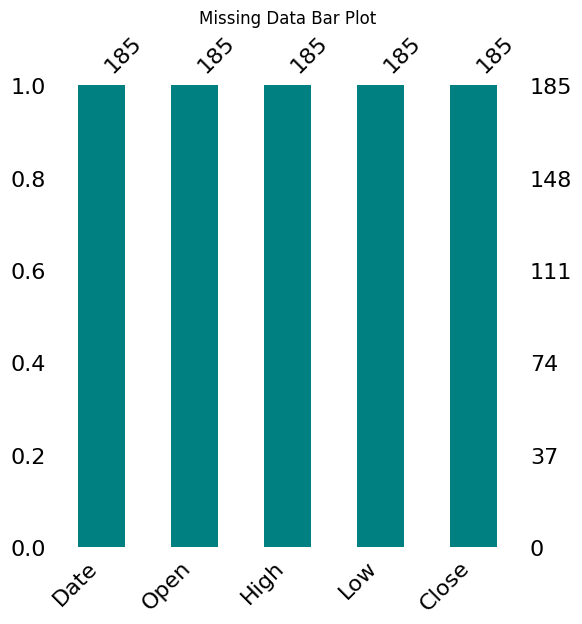

In [33]:
# Visualizing Missing Data with a Bar Plot
msno.bar(YesBank, figsize=(6, 6), color='teal')
plt.title('Missing Data Bar Plot')
plt.show()

### What did you know about your dataset?

The dataset comprises 185 records with five columns. These records span from July 2005 to November 2020 and contain monthly stock price information. The dataset consists of four independent variables, namely Date, Open, High, and Low, and one dependent variable, which is the closing price (Close). The dataset is clean, with no duplicate, null, or missing values. The data types for the independent variables are float, except for the Date column, which needs to be converted to datetime format.

- **Dataset Characteristics:**
  - Number of Columns: 5
  - Number of Records: 185
  - Data Timeframe: Monthly stock prices from July 2005 to November 2020
  - Data Columns:
    1. Date (Object data type)
    2. Open (Float data type)
    3. High (Float data type)
    4. Low (Float data type)
    5. Close (Dependent variable, Float data type)

- **Data Quality:**
  - No duplicate values present in the dataset.
  - No null values or missing data in any of the columns.

- **Data Preparation:**
  - The "Date" column should be converted from the object data type to the datetime data type for time-based analysis.

This structured presentation provides a clear understanding of the dataset's characteristics, content, and quality. It also highlights the need for a data type conversion to ensure accurate date-related analysis.

## ***2. Understanding Your Variables***

In [34]:
# Dataset Columns
YesBank.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [35]:
# Dataset Describe
YesBank.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


In [37]:
YesBank.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

Certainly, here's a rephrased version of the information:

1. Date: This column represents the record's date, with monthly dates ranging from July 2005 to November 2020. It is currently stored as an object data type and should be converted into a datetime format.

2. Open: This column contains the opening price of the share or stock, represented as numerical data.

3. High: This column records the highest price of the share on each day, presented as numerical values.

4. Low: The Low column contains the lowest price of the share for each day and is expressed as numerical data.

5. Close: The Close column signifies the closing price of the share for each day, stored as numerical values.

### Check Unique Values for each variable.

In [38]:
# Get the count of unique values for each variable.
for column in YesBank.columns.tolist():
    unique_count = YesBank[column].nunique()
    print(f"Number of unique values in {column}: {unique_count}")

Number of unique values in Date: 185
Number of unique values in Open: 183
Number of unique values in High: 184
Number of unique values in Low: 183
Number of unique values in Close: 185


## 3. ***Data Wrangling***

### Data Wrangling Code

In [42]:
# Write your code to make your dataset analysis ready.
#copy of my dataset
YesBank_data= YesBank.copy()

In [43]:
YesBank_copy.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [45]:
YesBank_data.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [47]:
len(YesBank_data[YesBank_data.duplicated()])

0

In [60]:
# Convert the 'Date' column from a string to datetime format

# Assuming the 'Date' column is in a format like 'Jul-05'
YesBank_data['Date'] = pd.to_datetime(YesBank_data['Date'], format='%b-%y')


In [61]:
YesBank_data.head()

,Date,Open,High,Low,Close
0,2005-07-01,13.00,14.00,11.25,12.46
1,2005-08-01,12.58,14.88,12.55,13.42
2,2005-09-01,13.48,14.87,12.27,13.30
3,2005-10-01,13.20,14.47,12.40,12.99
4,2005-11-01,13.35,13.88,12.88,13.41


In [62]:
YesBank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


In [63]:
YesBank_data.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [64]:
col=YesBank_data.columns.to_list()
numerical_cols=col[1:]

In [65]:
numerical_cols

['Open', 'High', 'Low', 'Close']

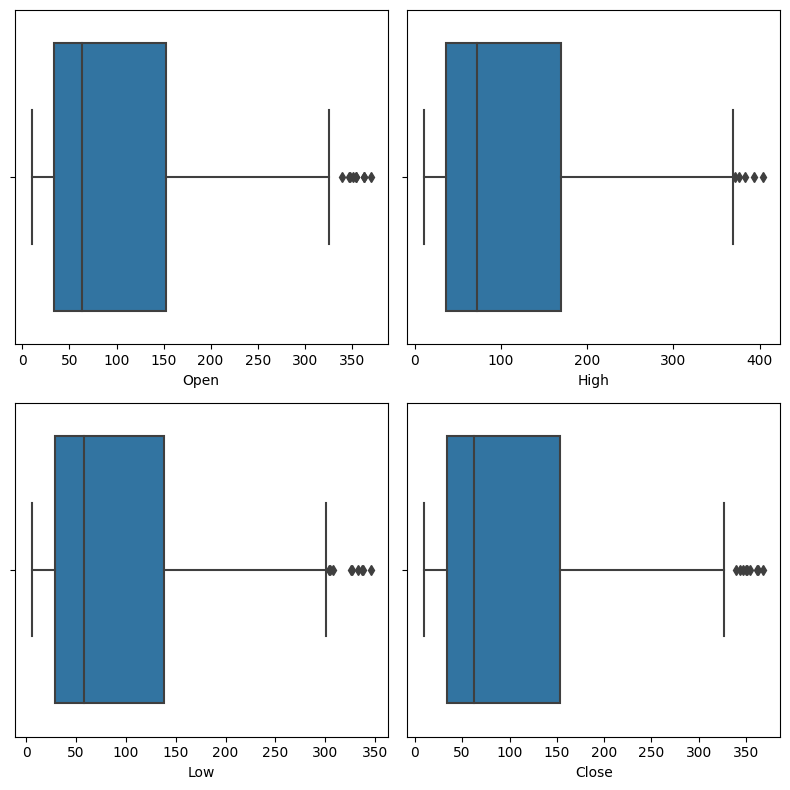

In [69]:
numerical_cols = ['Open', 'High', 'Low', 'Close']

# Create subplots in a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# Loop through numerical columns and create box plots in subplots
for i, column in enumerate(numerical_cols):
    row, col = i // 2, i % 2  # Calculate the row and column position
    sns.boxplot(data=YesBank_data, x=column, orient='h', ax=axes[row, col])
    axes[row, col].set_xlabel(column, fontsize=10)

plt.tight_layout()
plt.show()

In [70]:
#setting the Date as index.
YesBank_data.set_index('Date', inplace=True)

In [71]:
YesBank_data.head()

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41


In [72]:
# seperating the data
independent_variables = YesBank_data.columns.tolist()[:-1]
dependent_variable = ['Close']

print(independent_variables)
print(dependent_variable)

['Open', 'High', 'Low']
['Close']


### What all manipulations have you done and insights you found?

The 'Date' variable has been successfully converted to the datetime data type, and the remaining numerical variables, which include 'Open,' 'High,' 'Low,' and 'Close' (the dependent variable), have no missing values or duplicates. The data is clean and suitable for visualization. The fact that the mean values are higher in the numerical columns suggests the possibility of skewness in the data.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1: Evolution of Closing Prices Over Time

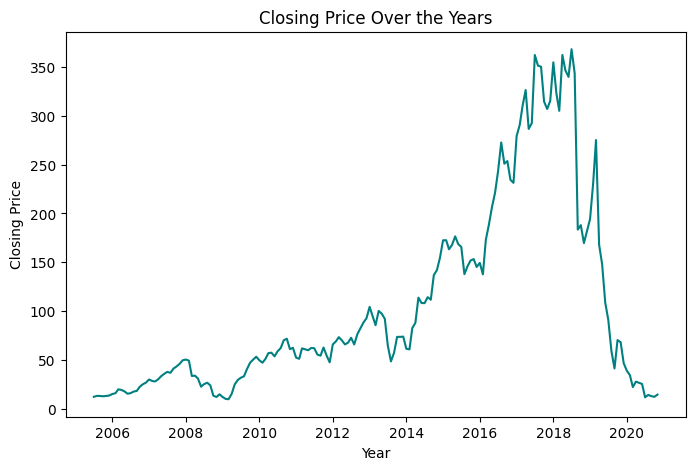

In [78]:
# Set the figure size
plt.figure(figsize=(8, 5))

# Plot the 'Close' column with a blue line
plt.plot(YesBank_data.index, YesBank_data['Close'], color='teal')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.title('Closing Price Over the Years')

# Display the plot
plt.show()


By examining the yearly closing price plot, it becomes evident that a significant decline occurred in the closing price of Yes Bank's stock in 2018. This substantial drop in value is directly linked to a high-profile fraud case that took place that year. The data suggests that this event had a profound negative impact on the company's stock performance. To prevent such a scenario from happening in the future, it is imperative for the company to strengthen its internal controls, risk management processes, and corporate governance practices. Additionally, transparent communication with shareholders and investors is crucial to rebuild trust and confidence in the company's operations. This way, Yes Bank can work towards maintaining a stable and secure financial outlook in the future.

##### 1. Why did you pick the specific chart?

To see how closing price in each year.

##### 2. What is/are the insight(s) found from the chart?

form seeing the plot, it is evident that after the fraud case in 2018, the closing price took a huge hit and dropped significantly.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

yes, because of the 2018  fraud the yes bank stock has suffered immensily from 2018. That should not happen in the future.

#### Chart - 2: Dependent Variable Distribution Analysis

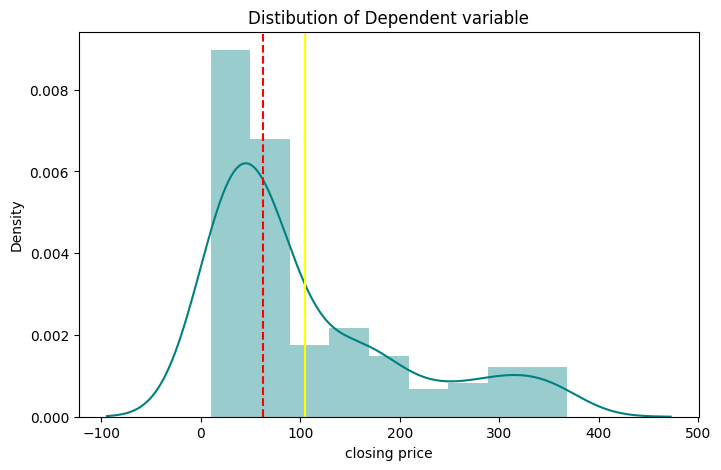

In [79]:
# Dependent variable 'Close'
#checking the distribution of the dependent variable
plt.figure(figsize=(8,5))
sns.distplot(YesBank_data['Close'],color="teal")
plt.title('Distibution of Dependent variable')
plt.xlabel('closing price')

plt.axvline(YesBank_data['Close'].mean(),color='yellow')
plt.axvline(YesBank_data['Close'].median(),color='red',linestyle='dashed')
plt.show()

Utilizing a distplot for examining the distribution of the dependent variable, we gain a more precise insight into its characteristics. The visual representation indicates that the data exhibits a certain degree of positive skewness, particularly skewed to the right. This observation underscores the inherent volatility in the closing price over time. The impact of the 2018 fraud case is evident in this skewness, highlighting the need for data transformation techniques to improve the predictive capabilities of the closing price model. By applying appropriate transformations, we can address the skewness issue and potentially achieve more accurate predictions for the closing price, taking into account both historical trends and the impact of significant events like the 2018 fraud incident.

##### 1. Why did you pick the specific chart?

To check the distribution of the Dependent variable. distplot gives more accurate result.

##### 2. What is/are the insight(s) found from the chart?

It can be seen that the data is somewhat positively skewed(right skew).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, by observing the chart we now know that the closing price will always change over a period of time and that too because of the fraud in 2018, data is skewed positively. transformation need to be applied which will result in better prediction of closing price.

#### Chart - 3: Transformed Dependent Variable Distribution Analysis

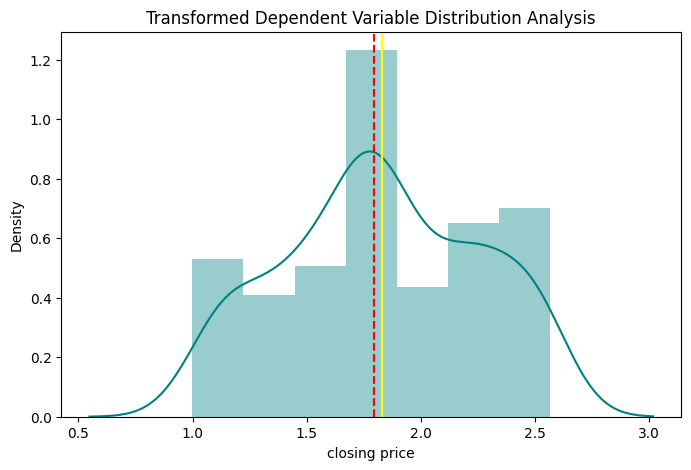

In [81]:
#applying log transformation
plt.figure(figsize=(8,5))
sns.distplot(np.log10(YesBank_data['Close']),color="teal")
plt.title('Transformed Dependent Variable Distribution Analysis')
plt.xlabel('closing price')


plt.axvline(np.log10(YesBank_data['Close']).mean(),color='yellow')
plt.axvline(np.log10(YesBank_data['Close']).median(),color='red',linestyle='dashed')
plt.show()

Assessing the distribution of the dependent variable, it's evident that the application of a log transformation has notably altered its characteristics. Post-transformation, the distribution closely resembles a normal distribution, which is a favorable quality for modeling purposes. This is further evidenced by the convergence of the mean and median values, indicating symmetry in the data. The proximity of these central tendency measures suggests a balanced distribution. Achieving normality in the data simplifies the modeling process, as it aligns with many statistical assumptions and enables the development of more reliable and accurate predictive models.

##### 1. Why did you pick the specific chart?

to see the distribution of y variable

##### 2. What is/are the insight(s) found from the chart?

After the log transformation it nearly looks like normal distribution.
mean and median are almost same

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

If the data is normally distributed, it becomes easy to develop a good model

#### Chart - 4: Exploring the Distributions of Independent Variables

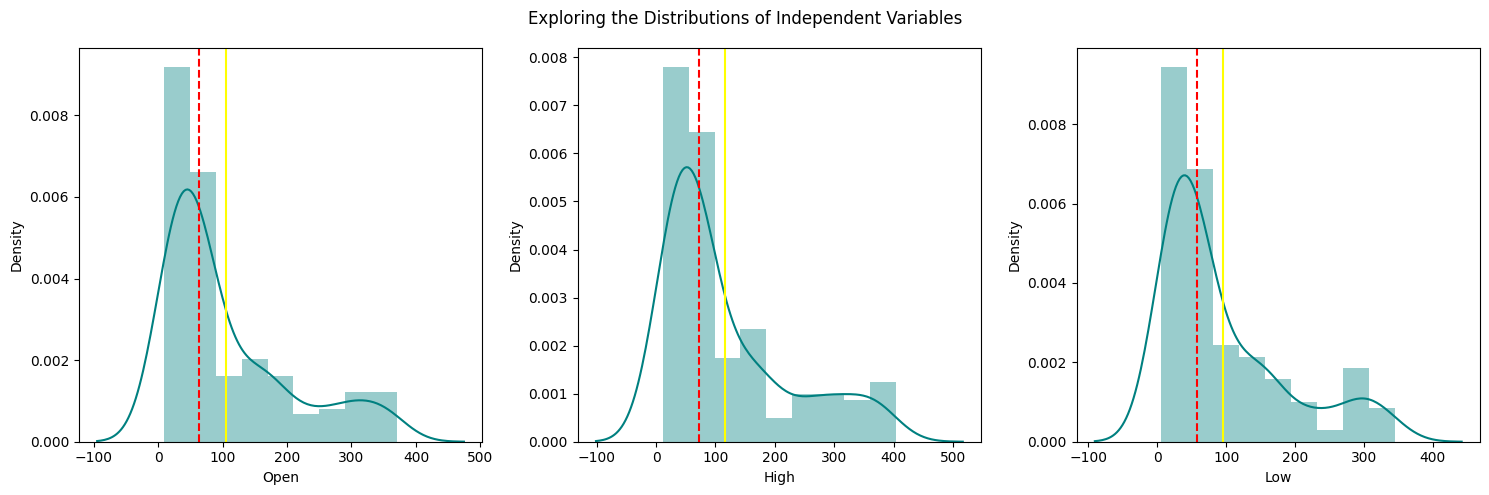

In [85]:
# Plotting the distributions of Independent features.
plt.figure(figsize=(15, 5))

for i, col in enumerate(independent_variables):
    plt.subplot(1, 3, i+1)
    sns.distplot(YesBank_data[col], color='teal')
    plt.xlabel(col, fontsize=10)

    # Plotting the mean and the median.
    plt.axvline(YesBank_data[col].mean(), color='yellow')
    plt.axvline(YesBank_data[col].median(), color='red', linestyle='dashed')

plt.suptitle('Exploring the Distributions of Independent Variables')
plt.tight_layout()
plt.show()

Evaluating the distributions across all independent variables, a consistent pattern emerges, revealing right-skewed distributions. This clear observation underlines the necessity for applying data transformations to the independent variables. By discerning this need through visual analysis, it becomes evident that transformation is a critical step in developing a robust and effective predictive model. Aligning the data with statistical assumptions, these transformations pave the way for enhanced modeling accuracy and reliability, ultimately contributing to the creation of a more potent predictive framework.

##### 1. Why did you pick the specific chart?

TO see the distributions across all independent variables.

##### 2. What is/are the insight(s) found from the chart?

It can be seen that all the independent variables are right skewed and transformation is required

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By observing above chart I came to know that transformation need to be applied on all independent variables which will essentially require for a good model

#### Chart - 5: Analyzing the Distributions of Transformed Independent Variables

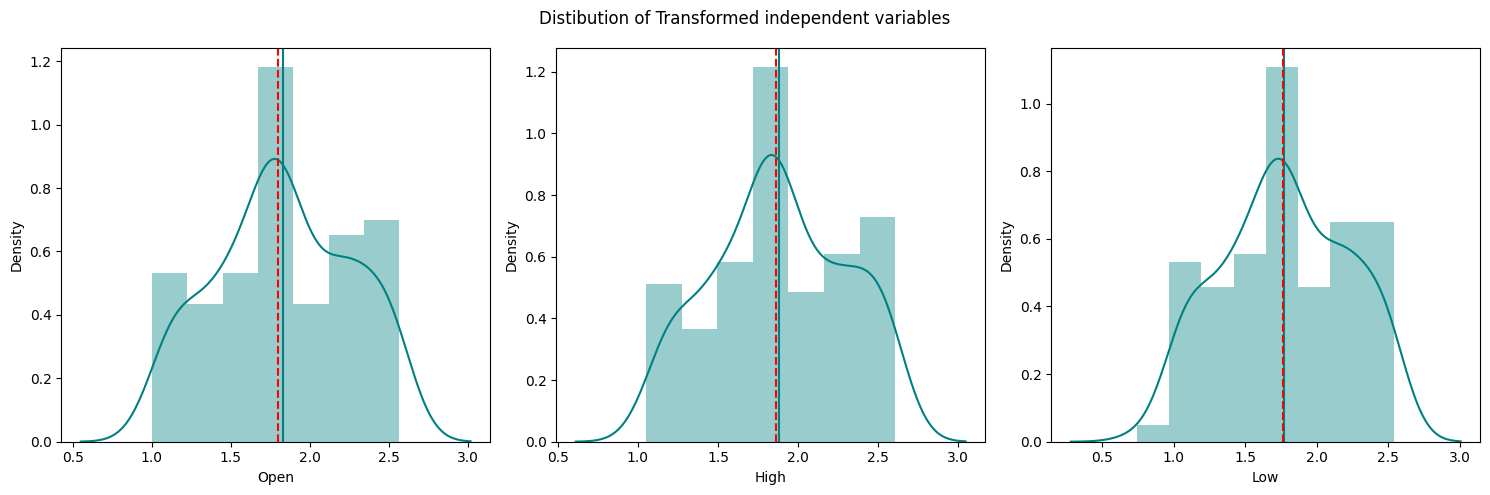

In [88]:
# Distribution of transformed independent variables
plt.figure(figsize=(15, 5))

for i, col in enumerate(independent_variables):
    plt.subplot(1, 3, i+1)
    sns.distplot(np.log10(YesBank_data[col]), color='teal')
    plt.xlabel(col, fontsize=10)

    # Plotting the mean and the median.
    plt.axvline(np.log10(YesBank_data[col]).mean(), color='teal')
    plt.axvline(np.log10(YesBank_data[col]).median(), color='red', linestyle='dashed')

plt.suptitle('Distibution of Transformed independent variables')
plt.tight_layout()
plt.show()

Examining the distributions across all independent variables after the application of log transformations, a notable transformation effect becomes apparent. The data for all independent variables now exhibits a close resemblance to a normal distribution, with the right-skewness largely mitigated. This alignment with a normal distribution is a pivotal aspect for model development, as it adheres to key statistical assumptions and facilitates the construction of optimal predictive models. Achieving this normality in the data post-transformation serves as a fundamental step towards building more robust and accurate models, enhancing their overall quality and performance.

##### 1. Why did you pick the specific chart?

TO see the distributions across all independent variables after transformation applied.

##### 2. What is/are the insight(s) found from the chart?

After the log Transformation, the data of all indepedent variables closely follow normal distribution

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We can build best model if the data is normally distributed.

#### Chart - 6

In [89]:
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.7 MB/s eta 0:00:00


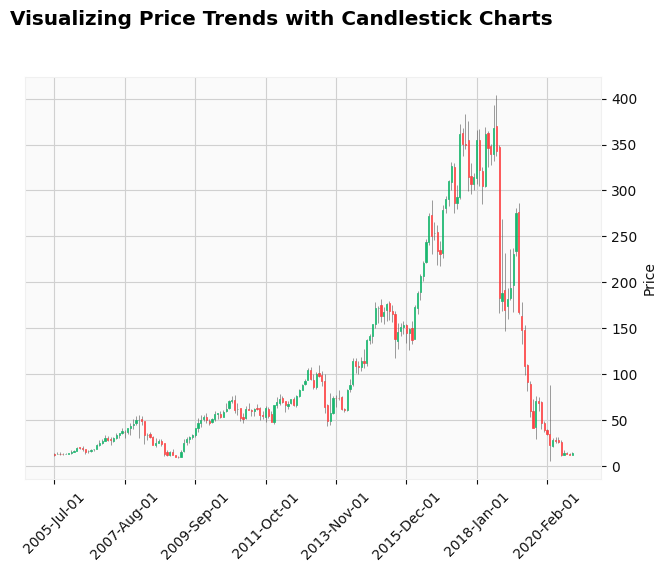

In [93]:
df_candle = YesBank_data[['Open', 'High', 'Low', 'Close']]
mpf.plot(df_candle, type='candle', style='yahoo', title='Visualizing Price Trends with Candlestick Charts')

Candlestick charts are a fundamental tool in the world of finance, widely employed to gain insights into monthly price trends. Upon analysis of the chart, it is evident that there isn't substantial deviation from the prices indicated by the open, high, and low variables. This consistency is vital for ensuring that there are no significant variations within the data. It provides a visual representation of the stability and consistency in these price variables, which is crucial for making informed financial decisions and understanding the dynamics of the market.

##### 1. Why did you pick the specific chart?

candle sticks are most widely used finance world. with this chart I wnat to see how variables are each month.

##### 2. What is/are the insight(s) found from the chart?

from the above chart, there is no much deviation from the price shown by open, high, low.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Ii is important to make sure that there is no huge variation in the data.

#### Chart - 7 Visualizing Price Data Distribution with Box Plots

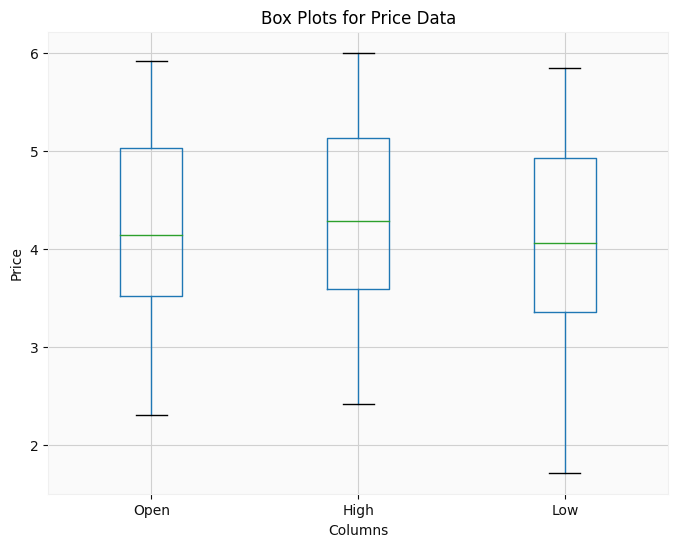

In [95]:
df_price = np.log(YesBank_data[['Open', 'High', 'Low']])

plt.figure(figsize=(8, 6))
df_price.boxplot()
plt.xlabel('Columns')
plt.ylabel('Price')
plt.title('Box Plots for Price Data')
plt.show()

Evaluating the presence of outliers within the independent variables, it is evident that after applying data transformations, outliers have notably diminished in significance. The absence of outliers is a favorable condition for constructing a robust and reliable model, as it can lead to more stable predictions. However, it's essential to consider that the dataset is relatively small, and completely removing outliers may not be advisable. Striking a balance between addressing outliers for data integrity and maintaining an appropriate dataset size is crucial. This approach ensures that while the model benefits from a lack of outliers, it remains representative of the underlying data distribution and does not risk overfitting or losing valuable information.

##### 1. Why did you pick the specific chart?

TO see outliers exists or not in the independent variables.

##### 2. What is/are the insight(s) found from the chart?

After transformation applied, outliers appeared to be diminished.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Outliers are not present in the data, this helps us building a good model, however given the dataset that small, it is also not advisable to completely remove outliers.

#### Chart - 8

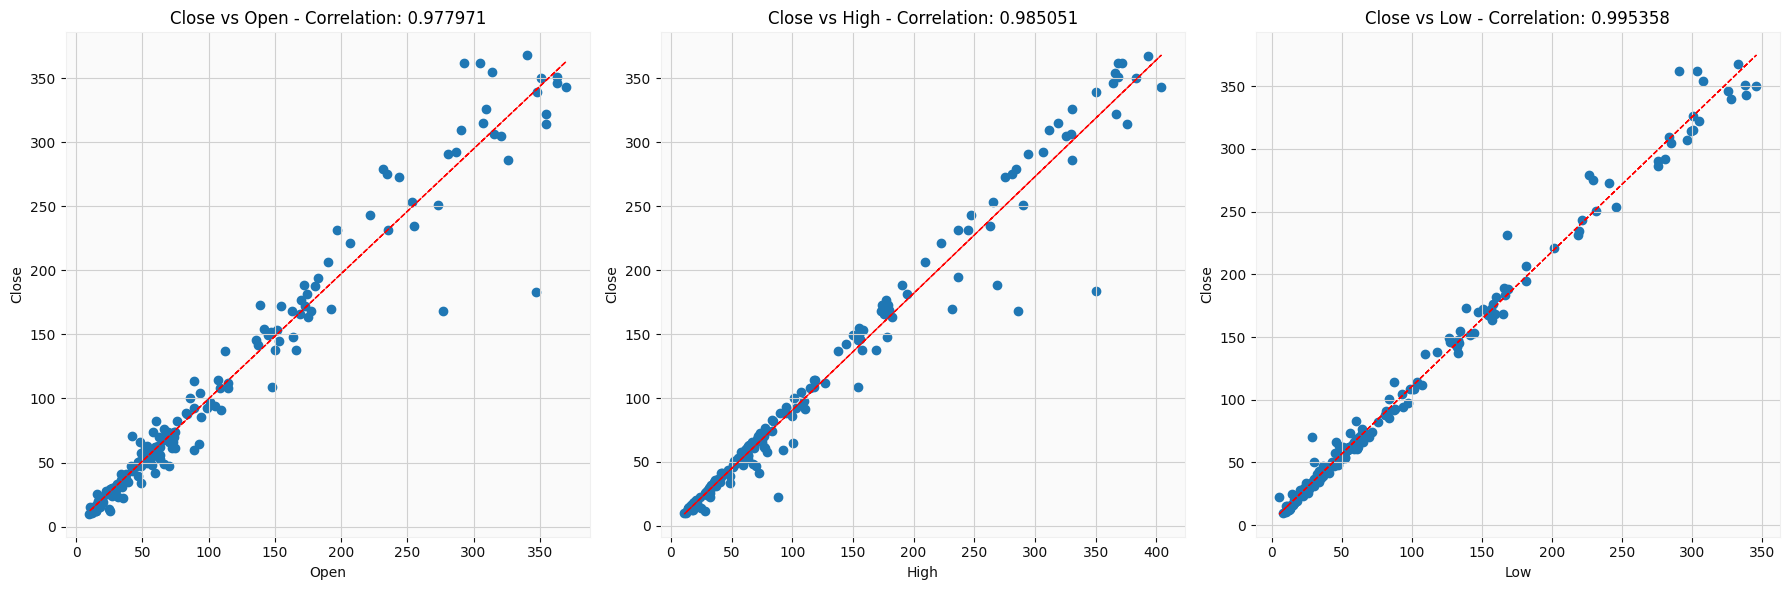

In [96]:
independent_variables = ['Open', 'High', 'Low']  # Replace with your independent variables

# Create subplots in a grid
fig, axes = plt.subplots(1, len(independent_variables), figsize=(18, 6))

label = YesBank_data['Close']

for i, col in enumerate(independent_variables):
    feature = YesBank_data[col]
    correlation = feature.corr(label)

    # Scatter plot
    axes[i].scatter(x=feature, y=label)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Close')
    axes[i].set_title(f'Close vs {col} - Correlation: {correlation:.6f}')

    # Regression line
    z = np.polyfit(feature, label, 1)
    y_ = np.poly1d(z)(feature)
    axes[i].plot(feature, y_, "r--", lw=1)

plt.tight_layout()
plt.show()

Plotting the correlations between the independent variables and the dependent variable reveals that all independent variables exhibit a high degree of correlation with the dependent variable. This strong linear relationship signifies that linear regression is likely to be a well-suited modeling approach and has the potential to yield high predictive accuracy. The substantial correlation between the independent features and the dependent variable provides confidence that a linear model can effectively capture the underlying patterns and relationships within the data, offering a promising path towards accurate predictions and meaningful insights.

##### 1. Why did you pick the specific chart?

I want to plot correlation between independent variable and dependent variable.

##### 2. What is/are the insight(s) found from the chart?

It seems that all independent variables are highly correlated and linear in fashion to dependent variable.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

when independent variables are highly correlated to y variable, it means that linear regression is going to be good fit model and also can produce good accuracy.

#### Chart - 9: Exploring the Temporal Evolution of Closing Prices

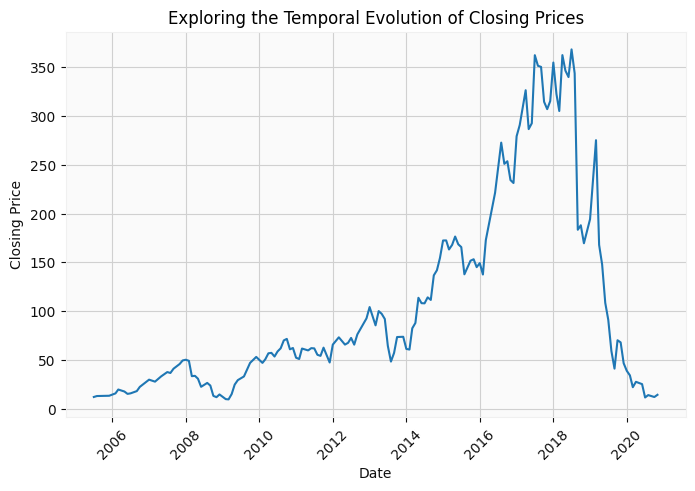

In [99]:
# Extract the date and closing price columns from the dataset
dates = YesBank_data.index
closing_prices = YesBank_data['Close']

# Create a line plot
plt.figure(figsize=(8,5))
plt.plot(dates, closing_prices)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Exploring the Temporal Evolution of Closing Prices')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

#### Chart - 10 - Correlation Heatmap

<Axes: >

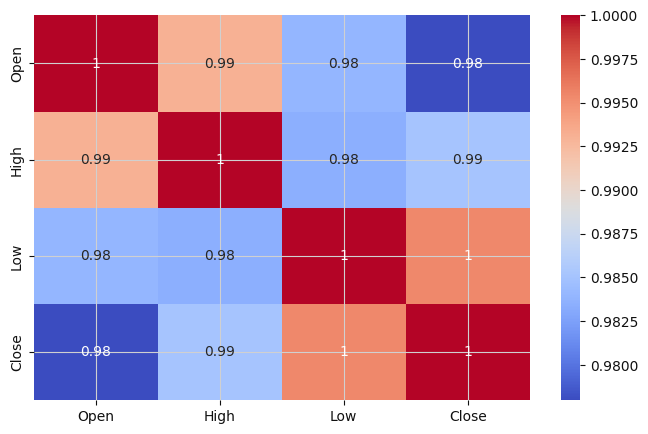

In [101]:
# Correlation Heatmap visualization code
plt.figure(figsize=(8,5))
correlation = YesBank_data.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

To discern the inter-variable relationships and correlations, it's anticipated that all independent variables are correlated, given the inherent stability in the finance sector among opening, high, and low prices. As a proactive measure to mitigate multicollinearity, feature generation becomes essential. By creating new features or modifying existing ones, we can reduce the interdependencies among the independent variables while retaining valuable information. This strategic approach ensures that the model remains robust, interpretable, and free from issues associated with multicollinearity, ultimately enhancing its performance and predictive power.

##### 1. Why did you pick the specific chart?

To identify the correlation between variables.

##### 2. What is/are the insight(s) found from the chart?

It is expected that all independent variables are correlated to each other because opening price, high price, low price will not vary much in the finance sector. So, I am going to do feature generation to avoid multicollinearity.

#### Chart - 11 - Pair Plot

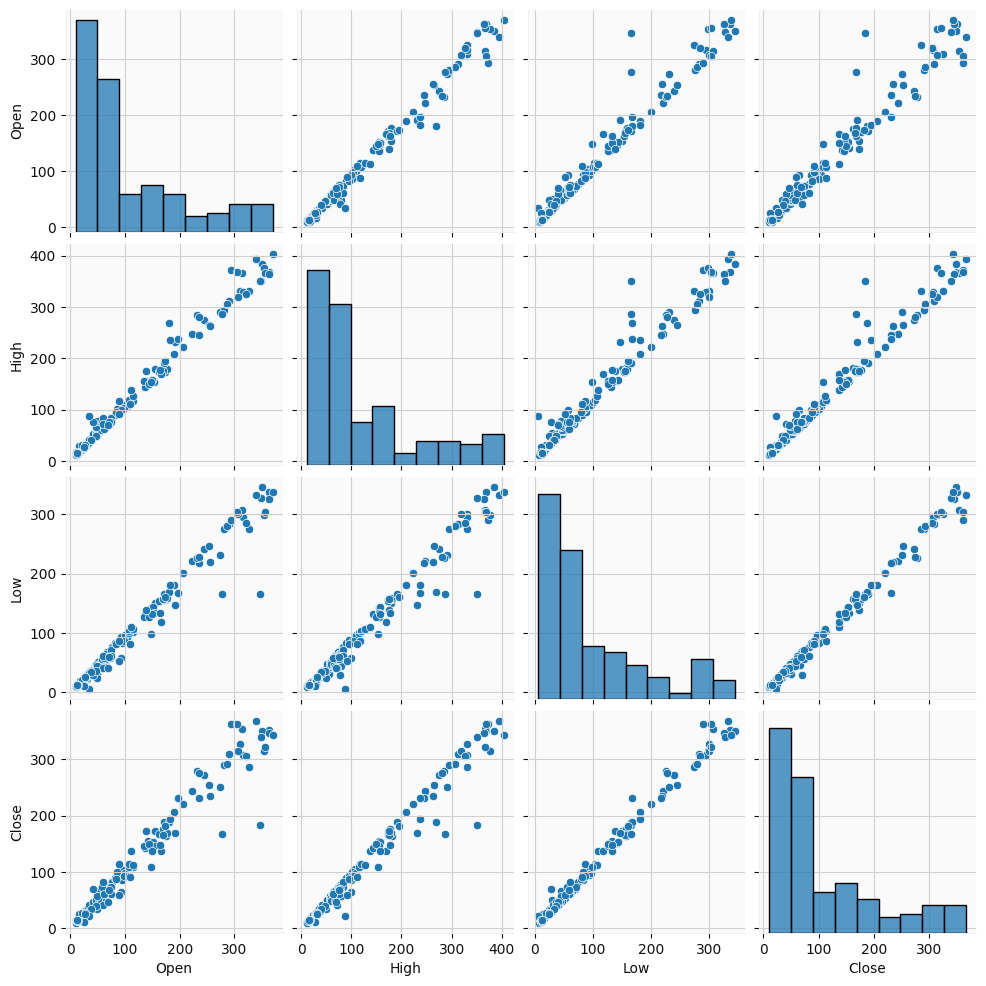

In [102]:
# Pair Plot visualization code
sns.pairplot(YesBank_data)

In [103]:
YesBank_data

,Open,High,Low,Close
Date,,,,
2005-07-01,13.00,14.00,11.25,12.46
2005-08-01,12.58,14.88,12.55,13.42
2005-09-01,13.48,14.87,12.27,13.30
2005-10-01,13.20,14.47,12.40,12.99
2005-11-01,13.35,13.88,12.88,13.41
...,...,...,...,...
2020-07-01,25.60,28.30,11.10,11.95
2020-08-01,12.00,17.16,11.85,14.37
2020-09-01,14.30,15.34,12.75,13.15


In [105]:
ds1=YesBank_data.copy()

##### 1. Why did you pick the specific chart?

Seaborn's Pairplot is a valuable tool for visualizing pairwise relationships among variables in a dataset. It compiles these relationships into a single comprehensive visualization, offering a holistic view of the data's interconnections. This visualization is instrumental in gaining insights into the dataset's structure, uncovering patterns, and understanding the relationships between the target variable and other features. By providing a compact and informative overview, Pairplot aids in identifying potential dependencies and trends, which is pivotal for data exploration and the initial stages of model building in data analysis and machine learning tasks.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Statement 1: The dataset exhibits a substantial disparity in the average closing prices when contrasting the earlier period (2005-2017) with the later period (2018-2020), suggesting a discernible shift in price dynamics over time.

Statement 2: A pronounced distinction in the mean closing prices is evident when comparing months characterized by high opening prices and those marked by low opening prices, signifying varying price behaviors associated with different opening price levels.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The mean closing prices do not significantly differ between the first half and the second half of the dataset.

Alternate Hypothesis (H1): There is a significant disparity in the mean closing prices between the first half and the second half of the dataset.

#### 2. Perform an appropriate statistical test.

In [106]:
# Perform Statistical Test to obtain P-Value
import numpy as np
from scipy import stats

# Divide the dataset into two halves: first half and second half
first_half = ds1['Close'][ds1.index.year <= 2017]
second_half = ds1['Close'][ds1.index.year >= 2018]

# Calculate the means and standard deviations of the two halves
mean1 = np.mean(first_half)
mean2 = np.mean(second_half)
std1 = np.std(first_half)
std2 = np.std(second_half)

# Calculate the sample sizes
n1 = len(first_half)
n2 = len(second_half)

# Calculate the standard error of the difference between means
standard_error = np.sqrt((std1**2 / n1) + (std2**2 / n2))

# Calculate the z-score
z = (mean1 - mean2) / standard_error

# Calculate the p-value (two-tailed test)
p_value = 2 * (1 - stats.norm.cdf(abs(z)))

# Set the significance level
alpha = 0.05

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in means.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in means.")


Reject the null hypothesis. There is a significant difference in means.


##### Which statistical test have you done to obtain P-Value?

If your dataset contains more than 30 records, you can use a Z-test to analyze your data. The Z-test is a statistical method that helps you determine whether a sample mean is significantly different from a population mean. It's commonly used when dealing with larger sample sizes because it relies on the normal distribution and its properties.

The Z-test involves calculating the Z-score, which indicates how many standard deviations a sample mean is away from the population mean. This score is then compared to a critical value from a standard normal distribution table or calculated using software.

In simpler terms, the Z-test allows you to assess if your data shows a statistically significant difference from a known or assumed population mean, making it a valuable tool for hypothesis testing and drawing conclusions about your dataset.

##### Why did you choose the specific statistical test?

Given that your dataset contains more than 30 records, you have a sufficiently large sample size. With this data, you can calculate the sample mean and sample standard deviation to summarize the central tendency and variability of your dataset. This information can be used for various statistical analyses, including hypothesis testing, confidence intervals, and making inferences about the population from which your data was sampled. The larger sample size enhances the reliability of these calculations and statistical tests, making your results more robust and representative of the underlying population characteristics.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Statement: We are investigating whether there is a statistically significant distinction in the average closing prices between months characterized by high opening prices and those marked by low opening prices.

Null Hypothesis (H0): The mean closing prices in months with high opening prices are either equal to or less than the mean closing prices in months with low opening prices.
Alternative Hypothesis (HA): The mean closing prices in months with high opening prices are greater than the mean closing prices in months with low opening prices.

#### 2. Perform an appropriate statistical test.

In [113]:
# Calculate the monthly mean opening and closing prices
monthly_data = ds1.resample('M').agg({'Open': 'mean', 'Close': 'mean'})

# Define the criteria for high and low opening prices
threshold = monthly_data['Open'].median()

# Split the data into two groups based on opening prices
high_opening_prices = monthly_data[monthly_data['Open'] > threshold]['Close']
low_opening_prices = monthly_data[monthly_data['Open'] <= threshold]['Close']

# Calculate sample statistics
mean_high = high_opening_prices.mean()
mean_low = low_opening_prices.mean()
std_high = high_opening_prices.std()
std_low = low_opening_prices.std()
n_high = len(high_opening_prices)
n_low = len(low_opening_prices)

# Compute the z-statistic
z_statistic = (mean_high - mean_low) / np.sqrt((std_high**2 / n_high) + (std_low**2 / n_low))

# Calculate the p-value
p_value = 2 * (1 - stats.norm.cdf(abs(z_statistic)))

# Set the significance level
alpha = 0.05

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the mean closing prices.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean closing prices.")

Reject the null hypothesis. There is a significant difference in the mean closing prices.


In [114]:
# Create two groups based on opening prices
high_opening_prices = ds1.loc[ds1['Open'] > threshold, 'Close']
low_opening_prices = ds1.loc[ds1['Open'] <= threshold, 'Close']

# Perform an independent t-test
t_statistic, p_value = stats.ttest_ind(high_opening_prices, low_opening_prices)

# Set the significance level
alpha = 0.05

# Compare the p-value with the significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the mean closing prices.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the mean closing prices.")

Reject the null hypothesis. There is a significant difference in the mean closing prices.


When working with sample data that is not normally distributed and exhibits skewness, it's important to choose the appropriate statistical test. For skewed data, the t-test may still be a viable option, especially if the sample size is reasonably large, as it is robust to departures from normality. However, if the skewness is pronounced and the sample size is sufficiently large (typically above 30), the central limit theorem often allows you to use a z-test, which assumes normality but can still provide meaningful insights. It's crucial to consider both the sample size and the degree of skewness when selecting the most suitable test for your data to ensure the reliability of your statistical analysis. Additionally, non-parametric tests like the Mann-Whitney U test can be considered if assumptions of normality and homogeneity of variances are not met.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [115]:
#There are no missing values in the dataset.

YesBank_data.isnull().sum()

Open     0
High     0
Low      0
Close    0
dtype: int64

### 2. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [116]:
# Manipulate Features to minimize feature correlation and create new features

# As all the independent variables are highly correlated, I can create a new feature by takinig mean from the each record of independent variables. This will avoid MultiCollinearity and also overfitting of the model.


YesBank_data['Mean_OHL'] = YesBank_data[['Open', 'High', 'Low']].mean(axis=1)
YesBank_data.head()



,Open,High,Low,Close,Mean_OHL
Date,,,,,
2005-07-01,13.00,14.00,11.25,12.46,12.750000
2005-08-01,12.58,14.88,12.55,13.42,13.336667
2005-09-01,13.48,14.87,12.27,13.30,13.540000
2005-10-01,13.20,14.47,12.40,12.99,13.356667
2005-11-01,13.35,13.88,12.88,13.41,13.370000


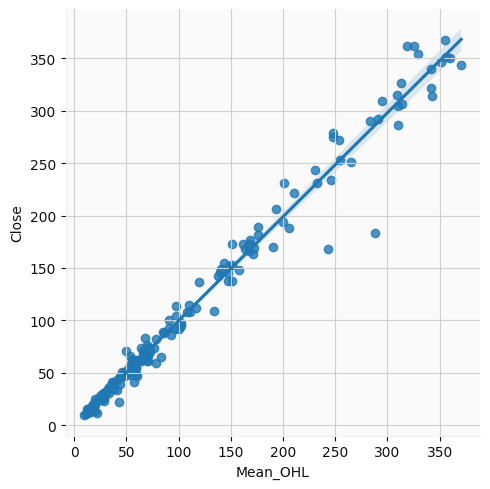

In [117]:
#checking for linear relationship b/w dependent variable and Independent variable

sns.lmplot(x='Mean_OHL', y='Close', fit_reg=True, data=YesBank_data)

<Axes: xlabel='Mean_OHL', ylabel='Density'>

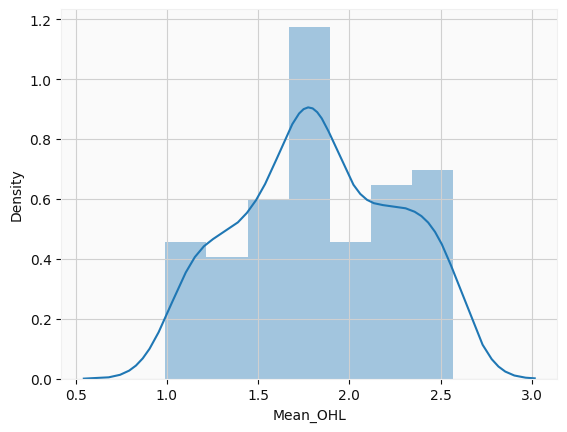

In [118]:
x=np.log10(YesBank_data['Mean_OHL'])
sns.distplot(x)

In [121]:
# use lags as additional features
for i in range(1, 13):
    YesBank_data["lag_{}".format(i)] = YesBank_data.Mean_OHL.shift(i)

Here's the code to calculate the lag values for the "Mean_OHL" column, taking the previous month's value, which can help uncover underlying patterns in your data. This code creates a new column "Previous_Month_Mean_OHL" in your DataFrame "ds1" that contains the Mean_OHL values from the previous month, enabling you to explore temporal patterns in your data using the lagged values.

In [122]:
YesBank_data.head()

,Open,High,Low,Close,Mean_OHL,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
Date,,,,,,,,,,,,,,,,,
2005-07-01,13.00,14.00,11.25,12.46,12.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-08-01,12.58,14.88,12.55,13.42,13.336667,12.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-09-01,13.48,14.87,12.27,13.30,13.540000,13.336667,12.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-10-01,13.20,14.47,12.40,12.99,13.356667,13.540000,13.336667,12.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-11-01,13.35,13.88,12.88,13.41,13.370000,13.356667,13.540000,13.336667,12.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 2. Feature Selection

In [123]:
#independent_variables1=['Open','Price_Range']
#independent_variables1
y_depend = YesBank_data.dropna().Close.values
x_independ = YesBank_data.dropna().drop(['Close','Open','High','Low'], axis=1)



In [124]:
dependent_variable

['Close']

##### Which all features you found important and why?

Including the "Open," "High," and "Close" prices in your analysis is essential because they play a crucial role in understanding how the stock market behaves. The "Open" price reflects the initial market sentiment, the "High" and "Low" prices capture the intraday fluctuations, and the "Close" price signifies the market's closing sentiment. By considering these variables, you can examine how changes in opening and intraday price fluctuations impact the closing price, which is vital for making informed decisions in the financial market. This comprehensive approach allows you to uncover valuable insights into price dynamics and potential trading opportunities, making it a valuable addition to your analysis.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

When dealing with both independent and dependent variables that exhibit skewness, it's a good practice to apply a log transformation. This transformation is effective in addressing small to moderate skewness, making the data more symmetric and closer to a normal distribution. By applying log transformation, you reduce the impact of extreme values and enhance the interpretability of statistical analyses, ensuring that your results are more robust and reliable. This approach is particularly valuable when working with skewed data, as it helps meet the assumptions of various statistical techniques, making your analysis more accurate and meaningful.

In [125]:
x_independ.head()

,Mean_OHL,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
Date,,,,,,,,,,,,,
2006-07-01,15.673333,16.666667,19.133333,19.793333,17.723333,15.956667,14.806667,13.643333,13.370000,13.356667,13.540000,13.336667,12.750000
2006-08-01,16.733333,15.673333,16.666667,19.133333,19.793333,17.723333,15.956667,14.806667,13.643333,13.370000,13.356667,13.540000,13.336667
2006-09-01,17.893333,16.733333,15.673333,16.666667,19.133333,19.793333,17.723333,15.956667,14.806667,13.643333,13.370000,13.356667,13.540000
2006-10-01,20.493333,17.893333,16.733333,15.673333,16.666667,19.133333,19.793333,17.723333,15.956667,14.806667,13.643333,13.370000,13.356667
2006-11-01,24.223333,20.493333,17.893333,16.733333,15.673333,16.666667,19.133333,19.793333,17.723333,15.956667,14.806667,13.643333,13.370000


In [126]:
# Transform Your data

x_independ['Mean_OHL'] = np.log10(x_independ['Mean_OHL'])

# Create the dependent variable data
Y = np.log10(y_depend)

x_independ.values



array([[ 1.19516137, 16.66666667, 19.13333333, ..., 13.54      ,
        13.33666667, 12.75      ],
       [ 1.22358246, 15.67333333, 16.66666667, ..., 13.35666667,
        13.54      , 13.33666667],
       [ 1.25269125, 16.73333333, 15.67333333, ..., 13.37      ,
        13.35666667, 13.54      ],
       ...,
       [ 1.15014216, 13.67      , 21.66666667, ..., 68.76666667,
        49.23333333, 57.66666667],
       [ 1.11859537, 14.13      , 13.67      , ..., 60.4       ,
        68.76666667, 49.23333333],
       [ 1.11969568, 13.14      , 14.13      , ..., 43.98333333,
        60.4       , 68.76666667]])

### 6. Data Scaling

In [129]:
# Scaling your data
# after train_test_split
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_independ.values)

##### Which method have you used to scale you data and why?

I'm planning to employ a standard scaler in my analysis. This scaler is a valuable tool for standardizing the data by transforming it into a common scale, typically with a mean of 0 and a standard deviation of 1. Standardization is essential, especially when dealing with variables that have different units or scales, as it ensures that each variable contributes equally to the analysis. By using a standard scaler, I'll be able to make the data more compatible for various statistical and machine learning techniques, enhancing the overall quality and interpretability of the results.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Given that I'm working with a limited number of features, I don't find it necessary to perform dimensionality reduction techniques. Instead, I can enhance the representation of the data by introducing additional derived features. One such feature is "Price Range," which is calculated as the difference between the "High" and "Low" prices. This variable serves as a measure of price volatility or fluctuation during each period, offering valuable insights into market dynamics. Additionally, I can create an "Average Price" feature, computed as the mean of the "Open," "High," and "Low" prices, which provides a broader perspective on the overall price level for each period and can help capture the underlying trends and tendencies in the stock price. These engineered features contribute to a more comprehensive and informative dataset, enhancing the quality of my analysis.

### 8. Data Splitting

In [130]:
# Split your data to train and test. Choose Splitting ratio wisely.

#splitting the data into a train and a test set. we do this using train test split.

x_train, x_test, y_train, y_test = train_test_split(x_scaled, Y, test_size = 0.2, random_state = 1)
print(x_train.shape)
print(x_test.shape)

(138, 13)
(35, 13)


##### What data splitting ratio have you used and why?

I've divided my dataset into two distinct subsets for model development and evaluation. Approximately 80% of the data is allocated to the training set, where the model learns from the historical patterns and relationships present in the data. The remaining 20% forms the testing set, which is used to assess the model's performance, ensuring that it can generalize well to new, unseen data. This division helps validate the model's ability to make accurate predictions and ensures that it doesn't overfit to the training data, ultimately leading to a more reliable and robust model.

## ***7. ML Model Implementation***

### ML Model - 1

We are implementing Basic Linear regression model.

The linear regression model assumes that the relationship between the dependent variable (Close) and the independent variables is linear, which means that the change in the dependent variable is proportional to the change in the independent variables.

During the training process, the linear regression model tries to find the values of the coefficients that minimize the sum of the squared differences between the predicted values and the actual values of the dependent variable.

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm
reg_with_transformation = LinearRegression().fit(x_train, y_train)




In [ ]:
reg_with_transformation.score(x_train,y_train)


0.9843542232370774

In [ ]:

# Predicting our test data.
y_train_pred_with_transformation= reg_with_transformation.predict(x_train)
y_test_pred_with_transformation = reg_with_transformation.predict(x_test)
#y_test_pred_without_transformation = reg_without_transformation.predict(X_test)


In [ ]:
comparision_trans = pd.DataFrame(zip(10**(y_test), 10**(y_test_pred_with_transformation)), columns = ['actual', 'pred'])
comparision_trans.head()

,actual,pred
0,88.14,87.713037
1,149.38,142.253914
2,49.42,50.536952
3,70.07,73.128303
4,62.54,61.988609


In [ ]:
train_MAE = mean_absolute_error(10**(y_train),(10**y_train_pred_with_transformation))
print(f"Mean Absolute Error : {train_MAE}")


train_MSE  = mean_squared_error(10**(y_train), 10**(y_train_pred_with_transformation))
print("MSE :" , train_MSE)

train_RMSE = np.sqrt(train_MSE)
print("RMSE :" ,train_RMSE)

train_r2 = r2_score(10**(y_train), 10**(y_train_pred_with_transformation))
print("R2 :" ,train_r2)

train_adjusted_r2=1-(1-r2_score(10**(y_train), 10**(y_train_pred_with_transformation)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2)

print('\n')


MAE = mean_absolute_error(10**(y_test),(10**y_test_pred_with_transformation))
print(f"Mean Absolute Error : {MAE}")

MSE  = mean_squared_error(10**(y_test), 10**(y_test_pred_with_transformation))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(10**(y_test), 10**(y_test_pred_with_transformation))
print("R2 :" ,r2)

adjusted_r2=1-(1-r2_score(10**(y_test), 10**(y_test_pred_with_transformation)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2)








Mean Absolute Error : 7.9796697876427505
MSE : 165.74457190566207
RMSE : 12.874182378142002
R2 : 0.9842311259574534
Adjusted R2: 0.9825779375497671


Mean Absolute Error : 7.6296835736156705
MSE : 247.3983988590329
RMSE : 15.72890329485921
R2 : 0.9627196081420266
Adjusted R2: 0.939641270325186


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

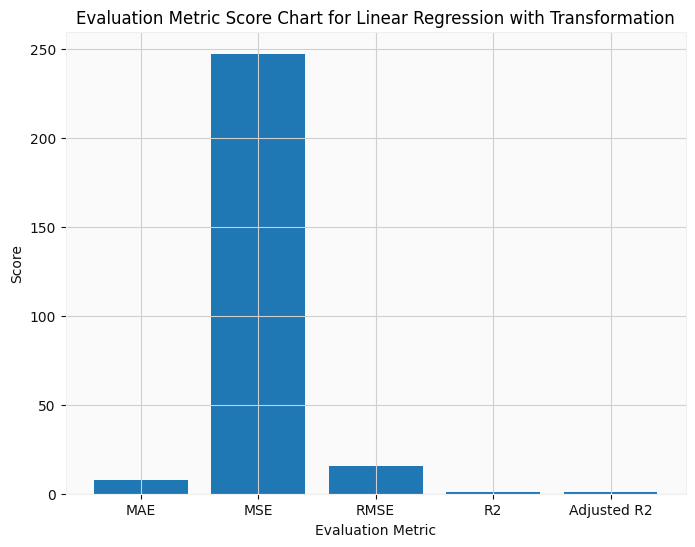

In [ ]:
# Visualizing evaluation Metric Score chart
metrics = ['MAE','MSE', 'RMSE', 'R2', 'Adjusted R2']
scores = [MAE,MSE,RMSE,r2,adjusted_r2]

# Plot the evaluation metric score chart
plt.figure(figsize=(8, 6))
plt.bar(metrics, scores)
plt.xlabel('Evaluation Metric')
plt.ylabel('Score')
plt.title('Evaluation Metric Score Chart for Linear Regression with Transformation')
plt.show()

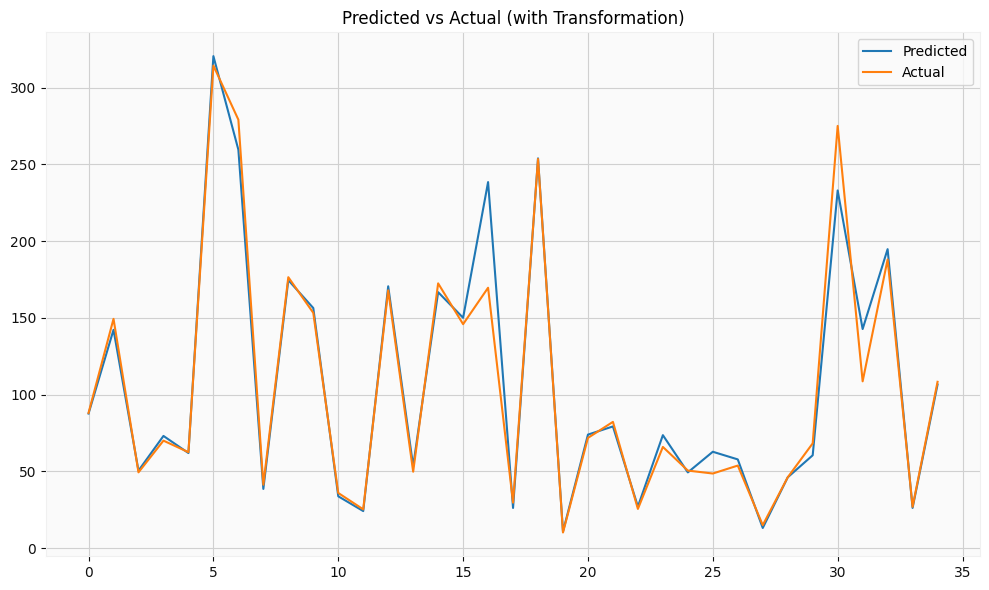

In [ ]:
#visualizing actual and predicted data


fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6))

# Plot with transformation
ax1.plot(10 ** (y_test_pred_with_transformation))
ax1.plot(np.array(10 ** (y_test)))
ax1.legend(["Predicted", "Actual"])
ax1.set_title("Predicted vs Actual (with Transformation)")


plt.tight_layout()
plt.show()


Text(0.5, 0.98, 'Residual Analysis')

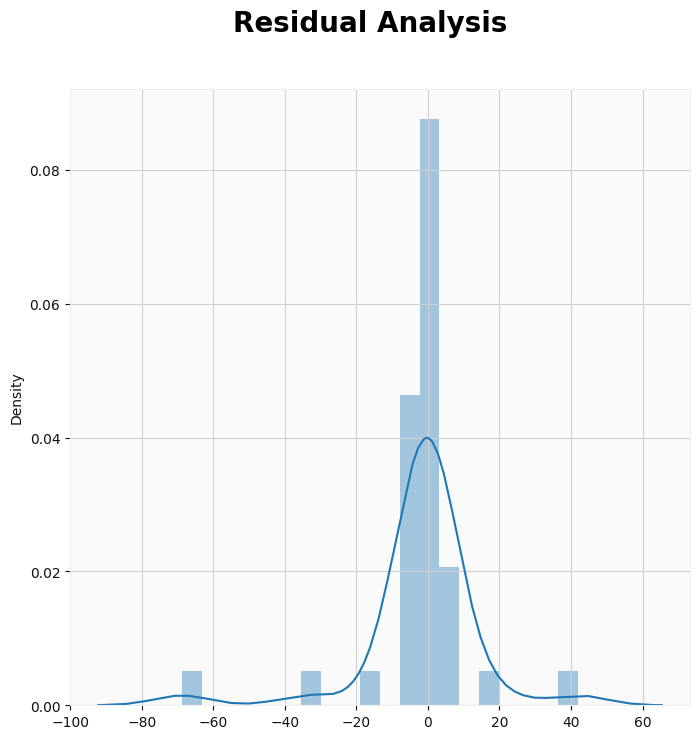

In [ ]:
fig=plt.figure(figsize=(8,8))

sns.distplot((10**(y_test)- 10**(y_test_pred_with_transformation)),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

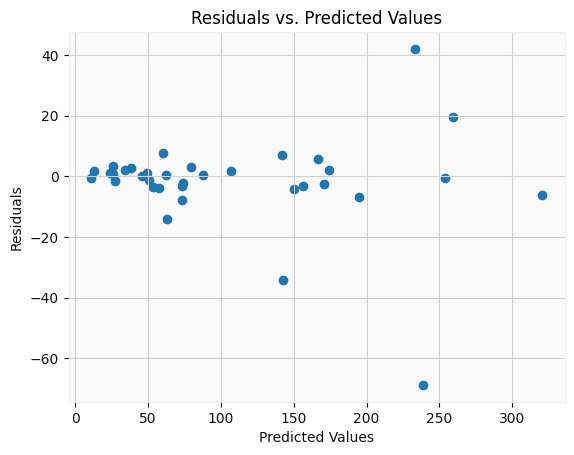

In [ ]:
residuals = 10**(y_test)-10**(y_test_pred_with_transformation)

# Plot the residuals against the predicted values
plt.scatter( 10**(y_test_pred_with_transformation),residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()


In [ ]:
linear_regessor_list = {'Train Mean Absolute Error':train_MAE,'Train Mean squared Error' : train_MSE,'Train Root Mean squared Error' : train_RMSE,'Train R2 score' : train_r2,'Train Adjusted R2 score' : train_adjusted_r2,'Mean Absolute Error':MAE,'Mean squared Error' : MSE,'Root Mean squared Error' : RMSE,'R2 score' : r2,'Adjusted R2 score' : adjusted_r2 }
metrics = pd.DataFrame.from_dict(linear_regessor_list, orient='index').reset_index()
metrics = metrics.rename(columns={'index':'Metric',0:'reg_with_transformation'})
metrics


,Metric,reg_with_transformation
0,Train Mean Absolute Error,7.979670
1,Train Mean squared Error,165.744572
2,Train Root Mean squared Error,12.874182
3,Train R2 score,0.984231
4,Train Adjusted R2 score,0.982578
5,Mean Absolute Error,7.629684
6,Mean squared Error,247.398399
7,Root Mean squared Error,15.728903
8,R2 score,0.962720
9,Adjusted R2 score,0.939641


The Root Mean Squared Error (RMSE) is slightly higher on the test set (15.728903) compared to the training set (12.874182), indicating a slightly larger average magnitude of error in predicting the 'Close' values on the test set.

The R2 Score is slightly lower on the test set (0.962720) compared to the training set (0.984231), suggesting that the model explains a slightly lower proportion of the variance in the 'Close' variable on the test set.

The Adjusted R2 Score is also lower on the test set (0.939641) compared to the training set (0.982578), accounting for the complexity of the model and the number of independent variables.

Overall, the model performs well on both the training and test sets, but there is a slightly higher level of error and slightly lower explanatory power on the test set, which is expected as the test set represents unseen data.

2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
parameter = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],

    'positive': [True, False]
}

# Create the grid search object
Lr_gs=GridSearchCV(reg_with_transformation,param_grid=parameter,cv=5,scoring='r2')

# Fit the Algorithm
Lr_gs.fit(x_train,y_train)

# Predict on the model
y_pred_test_gs=Lr_gs.predict(x_test)
y_pred_train_gs=Lr_gs.predict(x_train)



In [ ]:

# Metric Score for train set
train_MAE_gs = mean_absolute_error(10**(y_train),(10**y_pred_train_gs))
print(f"Mean Absolute Error : {train_MAE_gs}")


train_MSE_gs  = mean_squared_error(10**(y_train), 10**(y_pred_train_gs))
print("MSE :" , train_MSE_gs)

train_RMSE_gs = np.sqrt(train_MSE_gs)
print("RMSE :" ,train_RMSE_gs)

train_r2_gs = r2_score(10**(y_train), 10**(y_pred_train_gs))
print("R2 :" ,train_r2_gs)

train_adjusted_r2_gs=1-(1-r2_score(10**(y_train), 10**(y_pred_train_gs)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2_gs)

print('\n')

# Metric Score for test set
MAE_gs = mean_absolute_error(10**(y_test),(10**y_pred_test_gs))
print(f"Mean Absolute Error : {MAE_gs}")

MSE_gs  = mean_squared_error(10**(y_test), 10**(y_pred_test_gs))
print("MSE :" , MSE_gs)

RMSE_gs = np.sqrt(MSE_gs)
print("RMSE :" ,RMSE_gs)

r2_gs = r2_score(10**(y_test), 10**(y_pred_test_gs))
print("R2 :" ,r2_gs)

adjusted_r2_gs=1-(1-r2_score(10**(y_test), 10**(y_pred_test_gs)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2_gs)

Mean Absolute Error : 8.18581124874956
MSE : 222.49884509562526
RMSE : 14.916395177643466
R2 : 0.9788315465020357
Adjusted R2: 0.9766122731514427


Mean Absolute Error : 7.184358051477427
MSE : 128.3864513051523
RMSE : 11.3307745236216
R2 : 0.9806534834664071
Adjusted R2: 0.968677068469421


The MAE and RMSE values for the test set are lower than those for the train set, indicating better performance on the test data.

The R2 score for the test set is slightly higher than that for the train set, suggesting that the model generalizes well to unseen data.

However, the adjusted R2 score for the test set is lower than that for the train set, indicating that the model may be overfitting to the training data.

Overall, the model shows good performance on both the train and test sets, with low errors and high R2 scores. However, it is important to monitor the adjusted R2 score and consider potential overfitting when interpreting the results. To overcome that, we can apply regularization techniques.

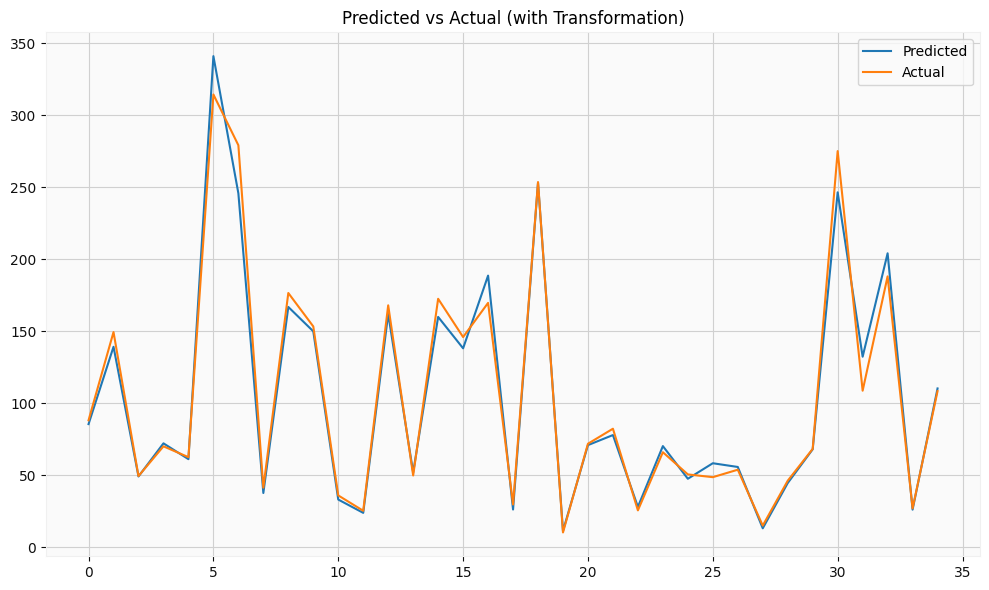

In [ ]:
plt.figure(figsize=(10, 6))

# Plot with transformation
plt.plot(10 ** (y_pred_test_gs))
plt.plot(np.array(10 ** (y_test)))
plt.legend(["Predicted", "Actual"])
plt.title("Predicted vs Actual (with Transformation)")

plt.tight_layout()
plt.show()


Text(0.5, 0.98, 'Residual Analysis')

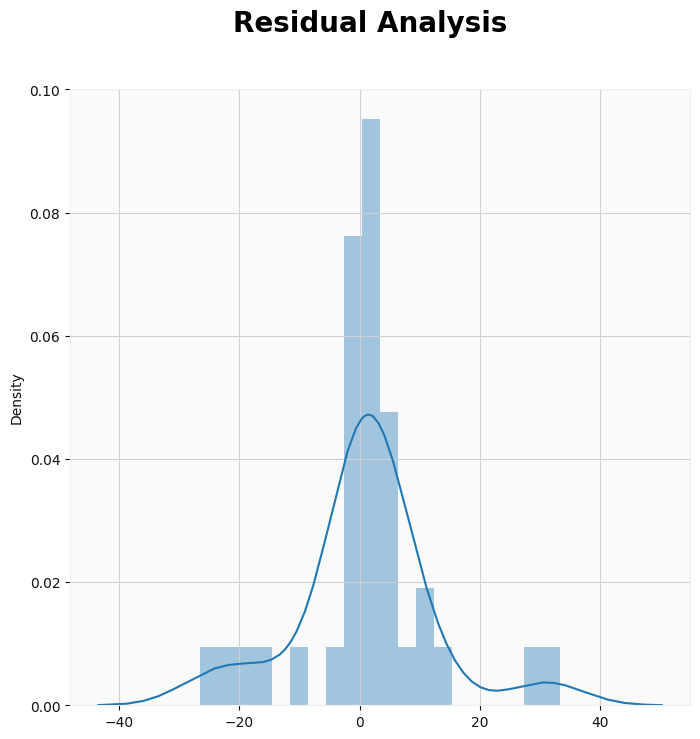

In [ ]:
fig=plt.figure(figsize=(8,8))

sns.distplot((10**(y_test)- 10**(y_pred_test_gs)),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

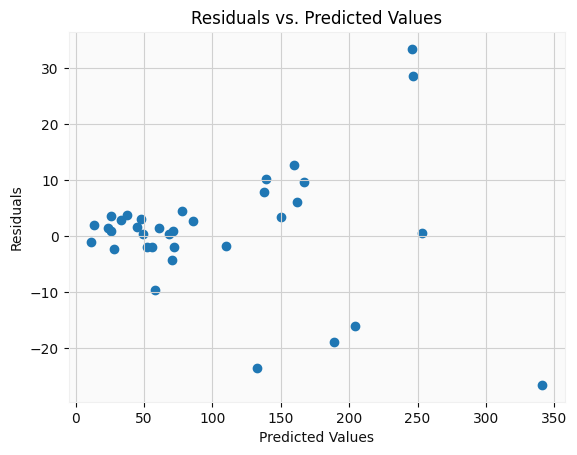

In [ ]:
#Homoscadasticity
residuals = 10**(y_test)-10**(y_pred_test_gs)

# Plot the residuals against the predicted values
plt.scatter( 10**(y_pred_test_gs),residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()


In [ ]:
np.mean(residuals)

0.8712340760106433

All the assumptions of Linear Regression is being taken care. Mean of Residuals is nearly zero, and there is no hetroscadasticity.

In [ ]:
metrics['Lr_gs'] = [train_MAE_gs, train_MSE_gs, train_RMSE_gs, train_r2_gs, train_adjusted_r2_gs,MAE_gs,MSE_gs,RMSE_gs,r2_gs,adjusted_r2_gs]


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV hyperparameter optimization technique which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

our goal should be to find the best hyperparameters values to get the perfect prediction results from our model.

In GridSearchCV,cross-validation is also performed which is used while training the model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
metrics

,Metric,reg_with_transformation,Lr_gs
0,Train Mean Absolute Error,7.979670,8.185811
1,Train Mean squared Error,165.744572,222.498845
2,Train Root Mean squared Error,12.874182,14.916395
3,Train R2 score,0.984231,0.978832
4,Train Adjusted R2 score,0.982578,0.976612
5,Mean Absolute Error,7.629684,7.184358
6,Mean squared Error,247.398399,128.386451
7,Root Mean squared Error,15.728903,11.330775
8,R2 score,0.962720,0.980653
9,Adjusted R2 score,0.939641,0.968677


Model has improved in terms of predicting the unseen data as the MAE,RMSE are lower than simple regression model and R2 and adjusted R2 has increased after cross validation and hyper parameter tuning. However, seeing the adjustedr2, it is possible that model is overfitting and I will try to regularize with r2 regressor.

### Ridge Regression (L2 Regularization):

Ridge adds a penalty term to the loss function that shrinks the coefficients towards zero without eliminating them completely.

It can be useful when dealing with multicollinearity, as it reduces the impact of highly correlated features.

Ridge is generally more suitable when all the features are expected to contribute to the model and no feature selection is desired.

I am using this because, I do not want to eliminate my features by using L1 or Elasticnet, as I included Lag values to identify the past trends to predict more accurately.

###RIDGE with Cross Validation and Hyper parameter tuning

In [ ]:
#Ridge Regularization
ridge = Ridge()
parameters2 = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,75,80,100]}
ridge_regressor = GridSearchCV(ridge, parameters2, scoring='r2', cv=10)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   75, 80, 100]},
             scoring='r2')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " r2 score is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  r2 score is:  0.9760390512790227


In [ ]:
print(ridge_regressor)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   75, 80, 100]},
             scoring='r2')


In [ ]:
best_ridge_model1 = ridge_regressor.best_estimator_

print(best_ridge_model1.coef_)
print(best_ridge_model1.intercept_)

[ 0.39515104 -0.01483846  0.00717508  0.0200902  -0.01428747 -0.00189978
  0.06516592 -0.01046888 -0.05517151  0.03438031  0.04428562 -0.05331164
 -0.02728311]
1.8740878481194465


In [ ]:
y_train_pred_ridge = ridge_regressor.predict(x_train)
y_test_pred_ridge = ridge_regressor.predict(x_test)


In [ ]:
ridge_regressor.score(x_train,y_train)

0.9835228344455276

In [ ]:

# Metric Score for train set
train_MAE_ridge = mean_absolute_error(10**(y_train),(10**y_train_pred_ridge))
print(f"Mean Absolute Error : {train_MAE_ridge}")


train_MSE_ridge  = mean_squared_error(10**(y_train), 10**(y_train_pred_ridge))
print("MSE :" , train_MSE_ridge)

train_RMSE_ridge = np.sqrt(train_MSE_ridge)
print("RMSE :" ,train_RMSE_ridge)

train_r2_ridge = r2_score(10**(y_train), 10**(y_train_pred_ridge))
print("R2 :" ,train_r2_ridge)

train_adjusted_r2_ridge=1-(1-r2_score(10**(y_train), 10**(y_train_pred_ridge)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2_ridge)

print('\n')

# Metric Score for test set
MAE_ridge = mean_absolute_error(10**(y_test),(10**y_test_pred_ridge))
print(f"Mean Absolute Error : {MAE_ridge}")

MSE_ridge  = mean_squared_error(10**(y_test), 10**(y_test_pred_ridge))
print("MSE :" , MSE_ridge)

RMSE_ridge = np.sqrt(MSE_ridge)
print("RMSE :" ,RMSE_ridge)

r2_ridge = r2_score(10**(y_test), 10**(y_test_pred_ridge))
print("R2 :" ,r2_ridge)

adjusted_r2_ridge=1-(1-r2_score(10**(y_test), 10**(y_test_pred_ridge)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2_ridge)

Mean Absolute Error : 7.822373428096926
MSE : 165.54855820067542
RMSE : 12.866567459920125
R2 : 0.9842497746250328
Adjusted R2: 0.9825985413195927


Mean Absolute Error : 7.051582916386262
MSE : 173.26818724315163
RMSE : 13.163137439195552
R2 : 0.9738902678968994
Adjusted R2: 0.9577271004045037


MAE has been reduced in test dataset which indicates model is predicting good on unseen data. RMSE is also similar in both cases.

In both cases, the R2 values are relatively high, indicating a good fit of the model to the data. The adjusted R2 values are slightly lower, suggesting that the inclusion of additional independent variables may not contribute significantly to the model's predictive power.

Overall, the model shows good performance on both the train and test datasets, with relatively low errors and high R2 values.

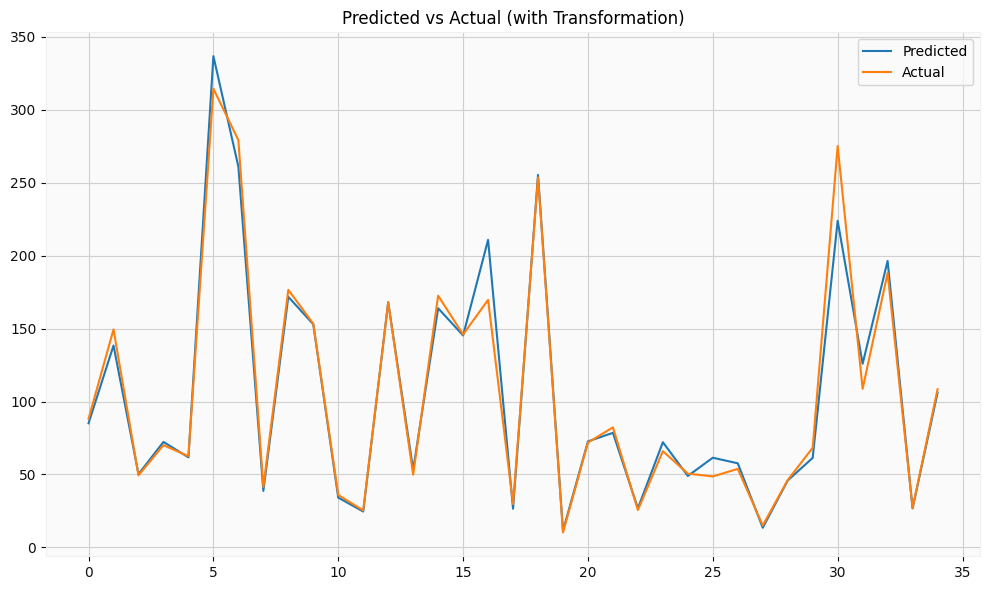

In [ ]:
plt.figure(figsize=(10, 6))

# Plot with transformation
plt.plot(10 ** (y_test_pred_ridge))
plt.plot(np.array(10 ** (y_test)))
plt.legend(["Predicted", "Actual"])
plt.title("Predicted vs Actual (with Transformation)")

plt.tight_layout()
plt.show()


Text(0.5, 0.98, 'Residual Analysis')

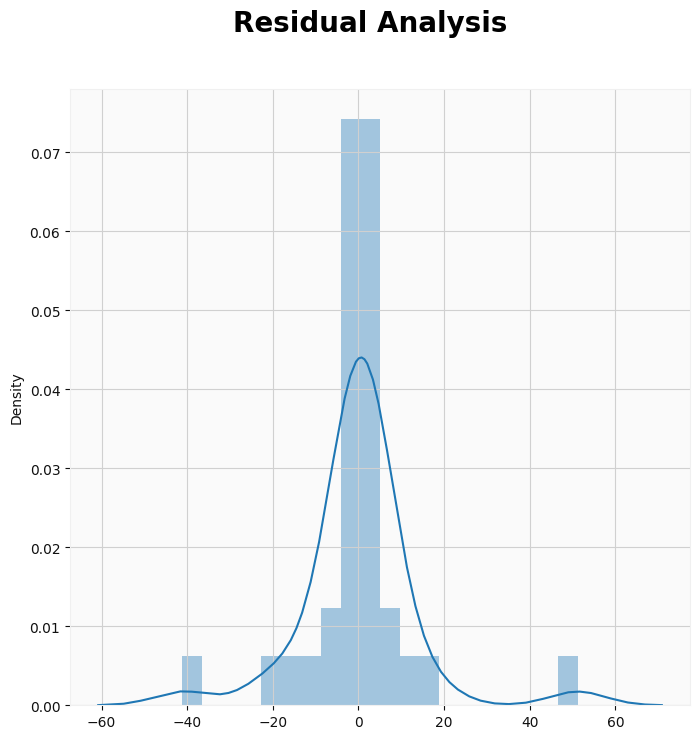

In [ ]:
fig=plt.figure(figsize=(8,8))

sns.distplot((10**(y_test)- 10**(y_test_pred_ridge)),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)

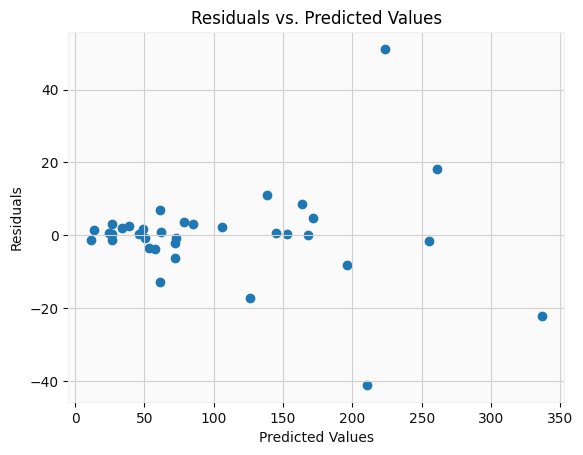

In [ ]:
#Homoscadasticity
residuals = 10**(y_test)-10**(y_test_pred_ridge)

# Plot the residuals against the predicted values
plt.scatter( 10**(y_test_pred_ridge),residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()


In [ ]:
metrics['ridge_regressor'] = [train_MAE_ridge, train_MSE_ridge, train_RMSE_ridge, train_r2_ridge, train_adjusted_r2_ridge,MAE_ridge,MSE_ridge,RMSE_ridge,r2_ridge,adjusted_r2_ridge]


In [ ]:
metrics

,Metric,reg_with_transformation,Lr_gs,ridge_regressor
0,Train Mean Absolute Error,7.979670,8.185811,7.822373
1,Train Mean squared Error,165.744572,222.498845,165.548558
2,Train Root Mean squared Error,12.874182,14.916395,12.866567
3,Train R2 score,0.984231,0.978832,0.984250
4,Train Adjusted R2 score,0.982578,0.976612,0.982599
5,Mean Absolute Error,7.629684,7.184358,7.051583
6,Mean squared Error,247.398399,128.386451,173.268187
7,Root Mean squared Error,15.728903,11.330775,13.163137
8,R2 score,0.962720,0.980653,0.973890
9,Adjusted R2 score,0.939641,0.968677,0.957727


Model has improved compared to previous models, as it is producing leat MAE, and also handling overfitting problem which we faced with second problem. So, I am considering the ridge_regressor as my best model among three.

### ML Model - 2

I am going to implement RandomForest model.

Random forest is an ensemble learning algorithm that constructs a multitude of decision trees at training time and outputs the mean prediction of the individual trees as the final prediction.

The RandomForestRegressor class allows you to train a regression model using the random forest algorithm, and then use it to make predictions on new data.

During the training process, the algorithm randomly selects a subset of features and a subset of observations to construct each decision tree.

This helps to reduce overfitting and improve the generalization performance of the model.



In [ ]:
# ML Model - 2 Implementation
rf = RandomForestRegressor()

# Fit the Algorithm
rf.fit(x_train,y_train)

# Predict on the model
y_pred_train_rf =rf.predict(x_train)
y_pred_test_rf =rf.predict(x_test)

In [ ]:
# Metric Score for train set
train_MAE_rf = mean_absolute_error(10**(y_train),(10**y_pred_train_rf))
print(f"Mean Absolute Error : {train_MAE_rf}")


train_MSE_rf  = mean_squared_error(10**(y_train), 10**(y_pred_train_rf))
print("MSE :" , train_MSE_rf)

train_RMSE_rf = np.sqrt(train_MSE_rf)
print("RMSE :" ,train_RMSE_rf)

train_r2_rf = r2_score(10**(y_train), 10**(y_pred_train_rf))
print("R2 :" ,train_r2_rf)

train_adjusted_r2_rf=1-(1-r2_score(10**(y_train), 10**(y_pred_train_rf)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2_rf)

print('\n')

# Metric Score for test set
MAE_rf = mean_absolute_error(10**(y_test),(10**y_pred_test_rf))
print(f"Mean Absolute Error : {MAE_rf}")

MSE_rf  = mean_squared_error(10**(y_test), 10**(y_pred_test_rf))
print("MSE :" , MSE_rf)

RMSE_rf = np.sqrt(MSE_rf)
print("RMSE :" ,RMSE_rf)

r2_rf = r2_score(10**(y_test), 10**(y_pred_test_rf))
print("R2 :" ,r2_rf)

adjusted_r2_rf=1-(1-r2_score(10**(y_test), 10**(y_pred_test_rf)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2_rf)

Mean Absolute Error : 3.7555427738544673
MSE : 34.921138891718975
RMSE : 5.909411044403577
R2 : 0.9966776164415253
Adjusted R2: 0.9963293020362013


Mean Absolute Error : 9.555805076398093
MSE : 284.3146773878396
RMSE : 16.861633295379175
R2 : 0.957156705003449
Adjusted R2: 0.9306346652436792


It can be clearly seen that model is not performed well on unseen data indicating overfitting. Lets overcome that by tuning hyperparameter and using cross validation


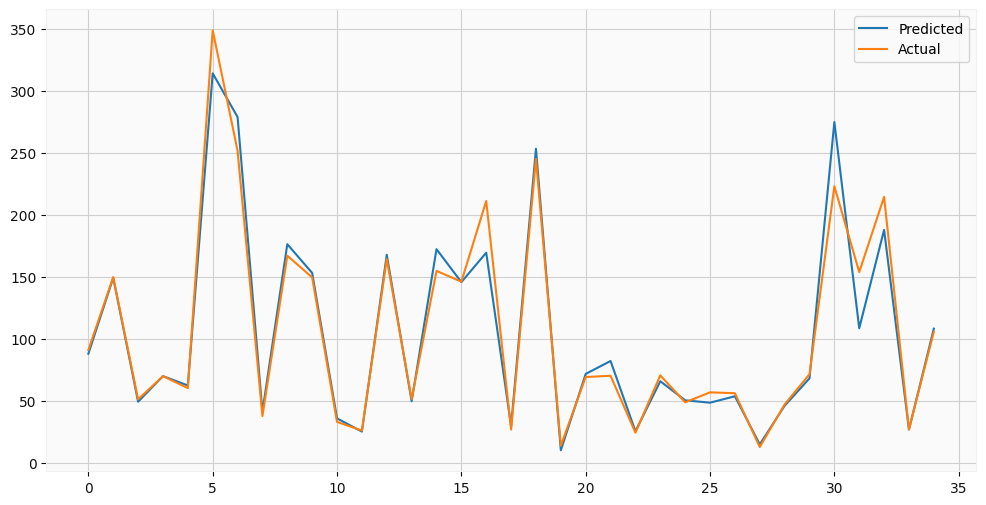

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(np.array(10**y_test))
plt.plot(10**((y_pred_test_rf)))
plt.legend(["Predicted","Actual"])
plt.show()

###2. Cross- Validation & Hyperparameter Tuning

In [ ]:

from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for hyperparameter tuning
param_grid_rf = {
    'n_estimators': [50,80,100,200,300],
    'max_depth': [1,2,6,7,8,9,10,20,30,40],
    'min_samples_split':[10,20,30,40,50,100,150,200],
    'min_samples_leaf': [1,2,8,10,20,40,50]


}


# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(rf, param_grid_rf,verbose=2, cv=5, scoring='r2')

# Fit the RandomizedSearchCV object to the training data
random_search.fit(x_train, y_train)

# Get the best estimator
best_model_rf_rs = random_search.best_estimator_




Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=6, min_samples_leaf=8, min_samples_split=40, n_estimators=200; total time=   0.4s
[CV] END max_depth=6, min_samples_leaf=8, min_samples_split=40, n_estimators=200; total time=   0.4s
[CV] END max_depth=6, min_samples_leaf=8, min_samples_split=40, n_estimators=200; total time=   0.3s
[CV] END max_depth=6, min_samples_leaf=8, min_samples_split=40, n_estimators=200; total time=   0.3s
[CV] END max_depth=6, min_samples_leaf=8, min_samples_split=40, n_estimators=200; total time=   0.3s
[CV] END max_depth=1, min_samples_leaf=40, min_samples_split=200, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, min_samples_leaf=40, min_samples_split=200, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, min_samples_leaf=40, min_samples_split=200, n_estimators=100; total time=   0.1s
[CV] END max_depth=1, min_samples_leaf=40, min_samples_split=200, n_estimators=100; total time=   0.2s
[CV] END max_depth=1, 

In [ ]:
best_model_rf_rs.feature_importances_

array([9.25476795e-01, 6.44461029e-02, 8.41783211e-03, 4.22966778e-04,
       9.31080618e-04, 2.78759445e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.64633309e-05, 0.00000000e+00,
       0.00000000e+00])

In [ ]:
print(best_model_rf_rs)

RandomForestRegressor(max_depth=9, min_samples_leaf=10, min_samples_split=30,
                      n_estimators=200)


In [ ]:
# Predict the model
y_pred_train_rf_rs= random_search.predict(x_train)
y_pred_test_rf_rs= random_search.predict(x_test)

In [ ]:
random_search.score(x_train,y_train)

0.9502768749682969

In [ ]:
# Metric Score for train set
train_MAE_rf_rs = mean_absolute_error(10**(y_train),(10**y_pred_train_rf_rs))
print(f"Mean Absolute Error : {train_MAE_rf_rs}")


train_MSE_rf_rs  = mean_squared_error(10**(y_train), 10**(y_pred_train_rf_rs))
print("MSE :" , train_MSE_rf_rs)

train_RMSE_rf_rs = np.sqrt(train_MSE_rf_rs)
print("RMSE :" ,train_RMSE_rf_rs)

train_r2_rf_rs = r2_score(10**(y_train), 10**(y_pred_train_rf_rs))
print("R2 :" ,train_r2_rf_rs)

train_adjusted_r2_rf_rs=1-(1-r2_score(10**(y_train), 10**(y_pred_train_rf_rs)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2_rf_rs)

print('\n')

# Metric Score for test set
MAE_rf_rs = mean_absolute_error(10**(y_test),(10**y_pred_test_rf_rs))
print(f"Mean Absolute Error : {MAE_rf_rs}")

MSE_rf_rs  = mean_squared_error(10**(y_test), 10**(y_pred_test_rf_rs))
print("MSE :" , MSE_rf_rs)

RMSE_rf_rs = np.sqrt(MSE_rf_rs)
print("RMSE :" ,RMSE_rf_rs)

r2_rf_rs = r2_score(10**(y_test), 10**(y_pred_test_rf_rs))
print("R2 :" ,r2_rf_rs)

adjusted_r2_rf_rs=1-(1-r2_score(10**(y_test), 10**(y_pred_test_rf_rs)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2_rf_rs)

Mean Absolute Error : 16.3191190987673
MSE : 661.2688827730213
RMSE : 25.715148896574977
R2 : 0.9370871359416927
Adjusted R2: 0.9304914324517088


Mean Absolute Error : 16.147765537902835
MSE : 545.1934377162906
RMSE : 23.349377672997853
R2 : 0.9178449614460114
Adjusted R2: 0.8669870804363993


The model has improved than the simple random forest model. it has low adjusted r2 value in test data saying that some additional features are not contributing to the output of y variable.

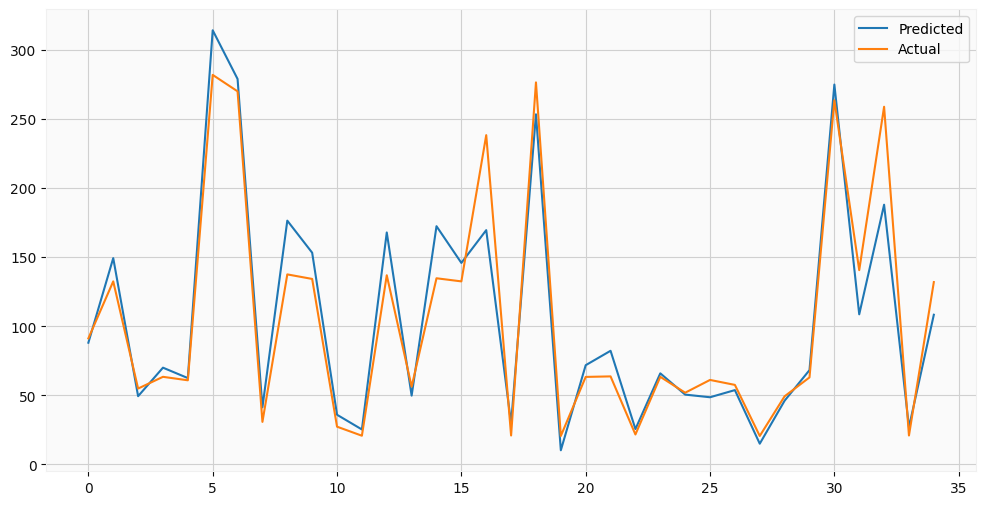

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(np.array(10**y_test))
plt.plot(10**((y_pred_test_rf_rs)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
metrics['random_search'] = [train_MAE_rf_rs, train_MSE_rf_rs, train_RMSE_rf_rs, train_r2_rf_rs, train_adjusted_r2_rf_rs,MAE_rf_rs,MSE_rf_rs,RMSE_rf_rs,r2_rf_rs,adjusted_r2_rf_rs]


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
metrics

,Metric,reg_with_transformation,Lr_gs,ridge_regressor,random_search
0,Train Mean Absolute Error,7.979670,8.185811,7.822373,16.319119
1,Train Mean squared Error,165.744572,222.498845,165.548558,661.268883
2,Train Root Mean squared Error,12.874182,14.916395,12.866567,25.715149
3,Train R2 score,0.984231,0.978832,0.984250,0.937087
4,Train Adjusted R2 score,0.982578,0.976612,0.982599,0.930491
5,Mean Absolute Error,7.629684,7.184358,7.051583,16.147766
6,Mean squared Error,247.398399,128.386451,173.268187,545.193438
7,Root Mean squared Error,15.728903,11.330775,13.163137,23.349378
8,R2 score,0.962720,0.980653,0.973890,0.917845
9,Adjusted R2 score,0.939641,0.968677,0.957727,0.866987


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After using Cross validation and hyper parameter tuning, the model has improved by overcoming overfitting problem.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

R2 score:

A high R2 score suggests that the model is able to explain a large portion of the variance in the data. In a business context, a high R2 score can indicate that the model is able to make accurate predictions, which could have a positive impact on decision-making.

Adjusted R2 score:

In a business context, a high adjusted R2 score can indicate that the model is able to make accurate predictions with a reasonable level of complexity, which could be more practical for deployment in a business setting.

Mean absolute error (MAE):

The MAE is a measure of the average absolute error of the model's predictions.

In a business context, a low MAE can indicate that the model is making relatively small errors, which could be important if the model is being used to make important decisions.

Root mean squared error (RMSE):

The RMSE is a measure of the average squared error of the model's predictions.

In a business context, a low RMSE can indicate that the model is making relatively small errors, which could be important if the model is being used to make important decisions.

### ML Model - 3

###XGBoost model.

It is a popular machine learning algorithm that uses an ensemble of decision trees to make predictions.

The XGBRegressor class allows us to train a regression model using the XGBoost algorithm which is then used to make predictions on new data.

The model is trained by fitting a sequence of decision trees to the training data, with each new tree trying to correct the errors of the previous trees.

The final model is a weighted sum of these individual trees.

In [ ]:
# ML Model - 3 Implementation

xgboost = XGBRegressor(objective= 'reg:squarederror')

# Fit the Algorithm
xgboost.fit(x_train,y_train)

# Predict on the model
y_pred_train_xg =xgboost.predict(x_train)
y_pred_test_xg =xgboost.predict(x_test)


In [ ]:
# Metric Score for train set
train_MAE_xg = mean_absolute_error(10**(y_train),(10**y_pred_train_xg))
print(f"Mean Absolute Error : {train_MAE_xg}")


train_MSE_xg  = mean_squared_error(10**(y_train), 10**(y_pred_train_xg))
print("MSE :" , train_MSE_xg)

train_RMSE_xg = np.sqrt(train_MSE_xg)
print("RMSE :" ,train_RMSE_xg)

train_r2_xg = r2_score(10**(y_train), 10**(y_pred_train_xg))
print("R2 :" ,train_r2_xg)

train_adjusted_r2_xg=1-(1-r2_score(10**(y_train), 10**(y_pred_train_xg)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2_xg)

print('\n')

# Metric Score for test set
MAE_xg = mean_absolute_error(10**(y_test),(10**y_pred_test_xg))
print(f"Mean Absolute Error : {MAE_xg}")

MSE_xg  = mean_squared_error(10**(y_test), 10**(y_pred_test_xg))
print("MSE :" , MSE_xg)

RMSE_xg = np.sqrt(MSE_xg)
print("RMSE :" ,RMSE_xg)

r2_xg = r2_score(10**(y_test), 10**(y_pred_test_xg))
print("R2 :" ,r2_xg)

adjusted_r2_xg=1-(1-r2_score(10**(y_test), 10**(y_pred_test_xg)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2_xg)

Mean Absolute Error : 0.15164743147034992
MSE : 0.08484693805475113
RMSE : 0.29128497739284653
R2 : 0.9999919276953465
Adjusted R2: 0.9999910814053425


Mean Absolute Error : 11.034003852844233
MSE : 286.2860672939444
RMSE : 16.91999016825791
R2 : 0.9568596368391302
Adjusted R2: 0.9301536977395441


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
#Converting into readable format
EM=['MAE','MSE','RMSE','r2','adjusted_r2']
train_xg=[train_MAE_xg,train_MSE_xg,train_RMSE_xg,train_r2_xg,train_adjusted_r2_xg]
test_xg=[MAE_xg,MSE_xg,RMSE_xg,r2_xg,adjusted_r2_xg]

#final dataframe of parameters
data_xg=pd.DataFrame({'Evalution Parameters': EM, 'Train':train_xg, 'Test':test_xg}).set_index('Evalution Parameters')
data_xg


,Train,Test
Evalution Parameters,,
MAE,0.151647,11.034004
MSE,0.084847,286.286067
RMSE,0.291285,16.919990
r2,0.999992,0.956860
adjusted_r2,0.999991,0.930154


It is completely learning the data including noise, that is why it is not performing well on test data. overfitting the train dataset.

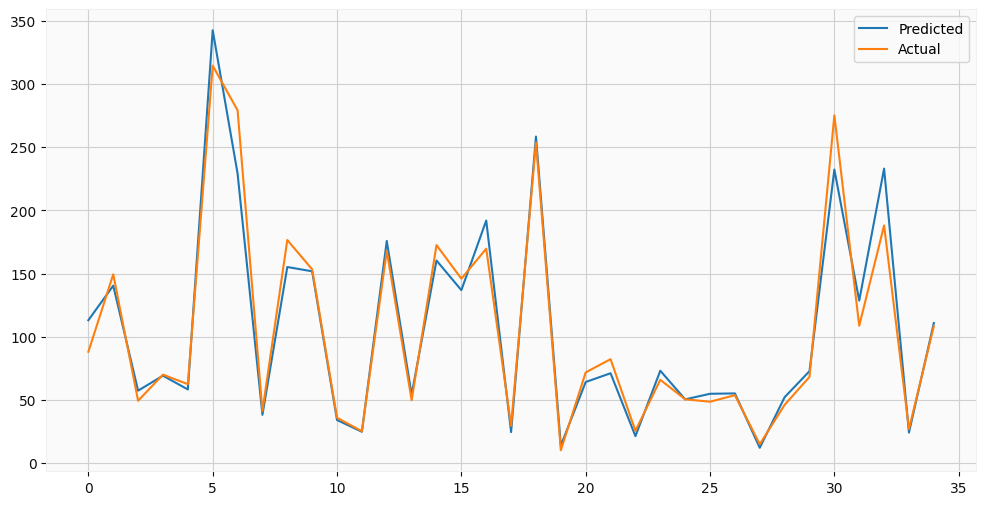

In [ ]:
plt.figure(figsize=(12,6))
plt.plot((10**y_pred_test_xg))
plt.plot(np.array((10**y_test)))
plt.legend(["Predicted","Actual"])
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)


# Define the parameter grid for hyperparameter tuning
param_grid_xg = {
    'n_estimators': [50,80,100,200,300],
    'max_depth': [2,4,6,8],
    'colsample_bytree': [0.7, 0.8],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]


}



# Create the GridSearchCV object
xgb_gs = GridSearchCV(estimator=xgboost, param_grid=param_grid_xg, cv=5, scoring='r2')

# Fit the GridSearchCV object to the training data
xgb_gs.fit(x_train, y_train)

# Get the best estimator
best_model_xgb_gs = xgb_gs.best_estimator_



# Predict on the model
y_pred_train_xgb_gs= xgb_gs.predict(x_train)
y_pred_test_xgb_gs= xgb_gs.predict(x_test)

In [ ]:
best_model_xgb_gs.feature_importances_

array([8.61247301e-01, 1.09582245e-01, 5.24532469e-03, 0.00000000e+00,
       2.92274659e-03, 4.91890078e-03, 2.61928304e-03, 3.04744486e-03,
       3.87621298e-03, 2.16099015e-03, 4.80066316e-04, 1.92599022e-03,
       1.97362970e-03], dtype=float32)

In [ ]:
print(best_model_xgb_gs)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)


In [ ]:
xgb_gs.score(x_train,y_train)

0.9840923436047051

In [ ]:
# Metric Score for train set
train_MAE_xgb_gs = mean_absolute_error(10**(y_train),(10**y_pred_train_xgb_gs))
print(f"Mean Absolute Error : {train_MAE_xgb_gs}")


train_MSE_xgb_gs  = mean_squared_error(10**(y_train), 10**(y_pred_train_xgb_gs))
print("MSE :" , train_MSE_xgb_gs)

train_RMSE_xgb_gs = np.sqrt(train_MSE_xgb_gs)
print("RMSE :" ,train_RMSE_xgb_gs)

train_r2_xgb_gs = r2_score(10**(y_train), 10**(y_pred_train_xgb_gs))
print("R2 :" ,train_r2_xgb_gs)

train_adjusted_r2_xgb_gs=1-(1-r2_score(10**(y_train), 10**(y_pred_train_xgb_gs)))*((x_train.shape[0]-1)/(x_train.shape[0]-x_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2_xgb_gs)

print('\n')

# Metric Score for test set
MAE_xgb_gs = mean_absolute_error(10**(y_test),(10**y_pred_test_xgb_gs))
print(f"Mean Absolute Error : {MAE_xgb_gs}")

MSE_xgb_gs  = mean_squared_error(10**(y_test), 10**(y_pred_test_xgb_gs))
print("MSE :" , MSE_xgb_gs)

RMSE_xgb_gs = np.sqrt(MSE_xgb_gs)
print("RMSE :" ,RMSE_xgb_gs)

r2_xgb_gs = r2_score(10**(y_test), 10**(y_pred_test_xgb_gs))
print("R2 :" ,r2_xgb_gs)

adjusted_r2_xgb_gs=1-(1-r2_score(10**(y_test), 10**(y_pred_test_xgb_gs)))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2_xgb_gs)

Mean Absolute Error : 10.366378584046293
MSE : 369.76940521924024
RMSE : 19.22938910156119
R2 : 0.9648202827480327
Adjusted R2: 0.96113208658452


Mean Absolute Error : 7.883140341622485
MSE : 145.45141668555263
RMSE : 12.060324070502942
R2 : 0.978081968859368
Adjusted R2: 0.9645136638675482


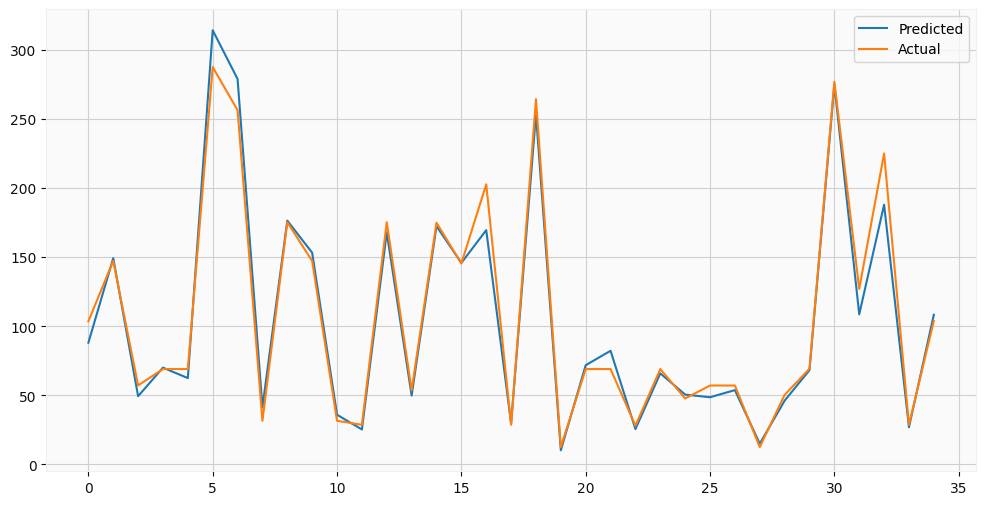

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(np.array(10**y_test))
plt.plot(10**((y_pred_test_xgb_gs)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
metrics['xgb_gs'] = [train_MAE_xgb_gs, train_MSE_xgb_gs, train_RMSE_xgb_gs, train_r2_xgb_gs, train_adjusted_r2_xgb_gs,MAE_xgb_gs,MSE_xgb_gs,RMSE_xgb_gs,r2_xgb_gs,adjusted_r2_xgb_gs]


##### Which hyperparameter optimization technique have you used and why?

I used GridSearchCV hyperparameter optimization technique which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

It uses a different combination of all the specified hyperparameters and their values and calculates the performance for each combination and selects the best value for the hyperparameters.

In GridSearchCV,cross-validation is also performed which is used while training the model.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [ ]:
metrics

,Metric,reg_with_transformation,Lr_gs,ridge_regressor,random_search,xgb_gs
0,Train Mean Absolute Error,7.979670,8.185811,7.822373,16.319119,10.366379
1,Train Mean squared Error,165.744572,222.498845,165.548558,661.268883,369.769405
2,Train Root Mean squared Error,12.874182,14.916395,12.866567,25.715149,19.229389
3,Train R2 score,0.984231,0.978832,0.984250,0.937087,0.964820
4,Train Adjusted R2 score,0.982578,0.976612,0.982599,0.930491,0.961132
5,Mean Absolute Error,7.629684,7.184358,7.051583,16.147766,7.883140
6,Mean squared Error,247.398399,128.386451,173.268187,545.193438,145.451417
7,Root Mean squared Error,15.728903,11.330775,13.163137,23.349378,12.060324
8,R2 score,0.962720,0.980653,0.973890,0.917845,0.978082
9,Adjusted R2 score,0.939641,0.968677,0.957727,0.866987,0.964514


The model has improved a lot after tuning the hyperparameters

In [ ]:
print(best_model_xgb_gs.feature_importances_)


[8.61247301e-01 1.09582245e-01 5.24532469e-03 0.00000000e+00
 2.92274659e-03 4.91890078e-03 2.61928304e-03 3.04744486e-03
 3.87621298e-03 2.16099015e-03 4.80066316e-04 1.92599022e-03
 1.97362970e-03]


### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I considered R2. adjusted R2 and RMSE as evaluation metrics.

R2 score is a measure of how well the model fits the data.

It ranges from 0 to 1, with a higher value indicating a better fit which means that the model is able to explain a large portion of the variance in the data which could have a positive impact on decision-making.

The adjusted R-squared provides a penalized measure of model fit that takes into account both the explanatory power of the model and the complexity of the model. It is particularly useful when comparing models with different numbers of predictors. A higher adjusted R-squared indicates a better fit of the model, as it reflects the proportion of variance in the dependent variable that is explained by the independent variables, adjusted for the model complexity.

RMSE is a measure of the average squared error of the model's predictions.

It is calculated as the square root of the mean squared error (MSE).

In a business context, a low RMSE can indicate that the model is making relatively small errors.



### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I am considering XGBRegressor(xgb_gs) as my final model.

This model has the highest R2 and adjusted r2 values on both the training and test sets, which indicates that it is doing a good job of explaining the variance in the target variable and also considering all the features. Ridge also performed well. but has low adjusted r2 in test data than in the train data. It indicates, that all the feautures are not necessary for ridge to predict the closing price, but I deliberately added lag values which captures previous data and pattern.

XGboost capturing all features and still predicting better than ridge. It even has low RMSE among all the three models and also performed well on test data than on the train data.



###Hypothesis Testing on overall Performance

Null Hypothesis: The XGBoost model does not have significant predictive power.

Alternative Hypothesis: The XGBoost model has significant predictive power.

In [ ]:
import numpy as np
from scipy.stats import f

# Obtain the predicted values from the XGBoost model
y_pred_hypo = xgb_gs.predict(x_test)

# Calculate the residual sum of squares (RSS)
RSS = np.sum((y_test - y_pred_hypo) ** 2)

# Calculate the total sum of squares (TSS)
TSS = np.sum((y_test - np.mean(y_test)) ** 2)

# Calculate the degrees of freedom
n = len(y_test)
k = x_test.shape[1]
df_model = k - 1
df_residual = n - k

# Calculate the F-statistic
F = ((TSS - RSS) / df_model) / (RSS / df_residual)

# Calculate the p-value
p_value = 1 - f.cdf(F, df_model, df_residual)

# Define the significance level (alpha)
alpha = 0.05

# Perform the hypothesis test
if p_value < alpha:
    print("Reject the null hypothesis. The model has significant predictive power.")
else:
    print("Fail to reject the null hypothesis. The model does not have significant predictive power.")


Reject the null hypothesis. The model has significant predictive power.


 I compared the F-statistic to the critical value from the F-distribution to determine whether to reject the null hypothesis. If the p-value is less than the chosen significance level (alpha), we reject the null hypothesis and conclude that the model has significant predictive power. Otherwise, if the p-value is greater than or equal to alpha, we fail to reject the null hypothesis and conclude that the model does not have significant predictive power.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

I will be using XGBoost model and for model explainability I am using SHAP (SHapley Additive exPlanations) value.

SHAP (Shapley Additive exPlanations) is the extension of the Shapley value, a game theory concept introduced in 1953 by mathematician and economist Lloyd Shapley. SHAP is an improvement of the method for machine learning model explainability study. It is used to calculate the impact of each part of the model on the final result. The concept is a mathematical solution for a game theory problem – how to share a reward among team members in a cooperative game?

Shapley's value assumes that we can compute the value of the surplus with or without each analyzed factor. The algorithm estimates the value of each factor by assessing the values of its ‘coalitions’. In the case of Machine Learning, the ‘surplus’ is a result of our algorithm and co-operators are different input values. The goal of SHAP is to explain the prediction by computing the contribution of each feature to the final result.

I am using TreeExplainer to explain my XGBoost Regressor(xgb_gs)

In [ ]:
pip install shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 9.1 MB/s eta 0:00:00


In [ ]:
import shap

explainer = shap.TreeExplainer(best_model_xgb_gs)

# Generate SHAP values for the entire training dataset
shap_values = explainer(x_test)

# Select a specific record for explanation (e.g., the first record in x_test)


# Explain the prediction for the selected record
shap.initjs()
shap.force_plot(shap_values[0], feature_names=x_independ.columns)

In [ ]:
x_test[0]

array([ 0.14729879, -0.4443443 , -0.51789102, -0.41933087, -0.36156657,
       -0.40554171, -0.4904546 , -0.54869648, -0.5338897 , -0.28327194,
       -0.15139856, -0.08698624, -0.20731774])

The base value: The original paper explains that the base value is “the value that would be predicted if we did not know any features for the current output.” In other words, it is the mean prediction, or mean.

Red/blue: Features that push the prediction higher (to the right) are shown in red, and those pushing the prediction lower are in blue.

OHL: has a negative impact on the target variable.It has lower value than the average OHL value So it pushes the prediction to the right.

lag_2 has a positive impact on the target variable. A higher than the average lag_2 value drives the prediction to the left.

lag_4: is positively related to the target variable. A higher than the average lag_4 value pushes the prediction to the left.

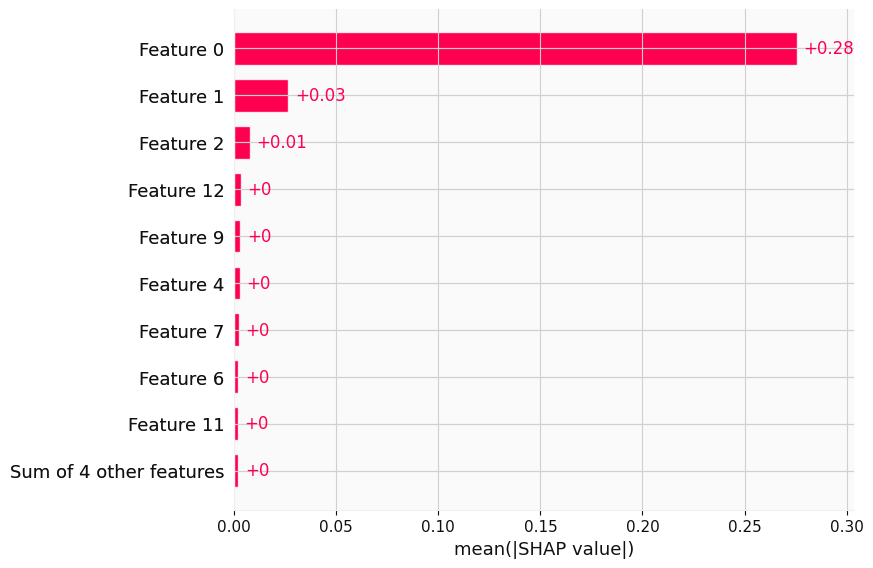

In [ ]:
shap.plots.bar(shap_values)

I plotted mean SHAP plot in which for each feature, we calculate the mean of the absolute SHAP values across all observations.

There is one bar for each feature.

Features that have large mean SHAP values will tend to have large positive/negative SHAP values. In other words, these are the features that have a significant impact on the model’s predictions.

This plot can be used as a feature importance plot to highlight features that are important to a model’s predictions.

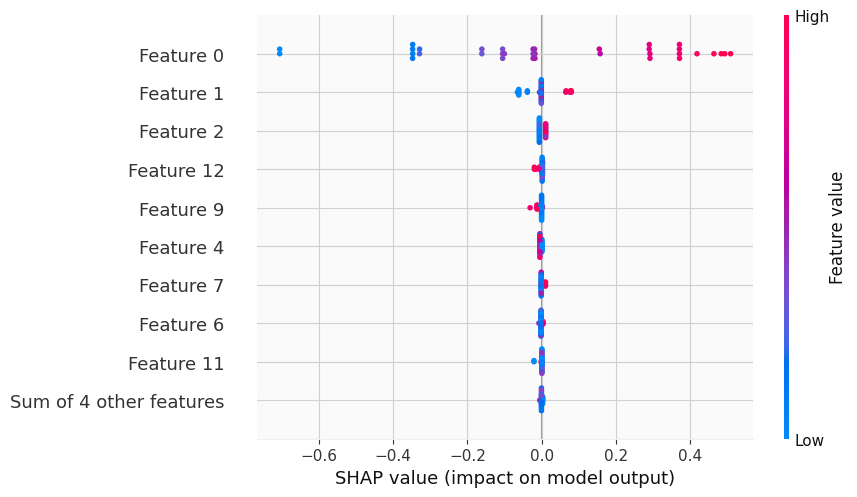

In [ ]:

shap.plots.beeswarm(shap_values)

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
import pickle

filename = '/content/drive/MyDrive/Colab Notebooks/capstone_project/yesbank_stock_mlpredictor.pkl'
pickle.dump(xgb_gs, open(filename, 'wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
filename = '/content/drive/MyDrive/Colab Notebooks/capstone_project/yesbank_stock_mlpredictor.pkl'
yesbank_ml_model = pickle.load(open(filename, 'rb'))

In [ ]:
abc=yesbank_ml_model.predict(x_test)
r2_score(y_test,abc)



0.9824008697897321

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***